<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Stock market prediction is the act of trying to determine the future value of a company stock or other financial instrument traded on an exchange. The successful prediction of a stock's future price could yield significant profit.Here we will use ML methods to analyze and predict Bitcoin prices
</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Period=period of later RSI and MFI indicator
</p>

In [2]:
symbol='BTC-USD'
days=7
period=14

# Downloading the data

In [3]:
d=yf.download(symbol)
print(d.shape)
d.head()

[*********************100%***********************]  1 of 1 completed
(3255, 6)


Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
First of all we use the most common ML method in algo trading, which is Linear Regression
</p>

# Preparing the data

In [4]:
y=d['Close'].shift(-days)
y

Date
2014-09-17    423.204987
2014-09-18    411.574005
2014-09-19    404.424988
2014-09-20    399.519989
2014-09-21    377.181000
                 ...    
2023-08-11           NaN
2023-08-12           NaN
2023-08-13           NaN
2023-08-14           NaN
2023-08-15           NaN
Name: Close, Length: 3255, dtype: float64

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
I've skipped these parts but by dropping Open price and Volume we get the most percise model
</p>

In [5]:
D=d[:-days]
y=y[:-days]
D=D.drop(['Adj Close','Open','Volume'],axis=1)
D

High           Low         Close
Date                                                
2014-09-17    468.174011    452.421997    457.334015
2014-09-18    456.859985    413.104004    424.440002
2014-09-19    427.834991    384.532013    394.795990
2014-09-20    423.295990    389.882996    408.903992
2014-09-21    412.425995    393.181000    398.821014
...                  ...           ...           ...
2023-08-04  29302.078125  28885.335938  29074.091797
2023-08-05  29102.464844  28957.796875  29042.126953
2023-08-06  29160.822266  28963.833984  29041.855469
2023-08-07  29244.281250  28724.140625  29180.578125
2023-08-08  30176.796875  29113.814453  29765.492188

[3248 rows x 3 columns]

In [6]:
from sklearn.model_selection import train_test_split
split=int(0.8*len(D))
D_train,D_test,y_train,y_test=D[:split],D[split:],y[:split],y[split:]
D_train, D_val,y_train,y_val= train_test_split(D_train,y_train,test_size = 0.2,random_state = 10)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Simple Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(D_train,y_train)
print('Score=',lr.score(D_val,y_val))
print("Coefficient of determination: %.2f" % 
      r2_score(y_val, lr.predict(D_val)))

Score= 0.9833374399765663
Coefficient of determination: 0.98


In [9]:
print('coefs:',D_test.columns.values)
print(lr.coef_)

coefs: ['High' 'Low' 'Close']
[-0.08363278  0.11168567  0.98572925]


# Lasso

In [10]:
from sklearn.linear_model import Lasso
acc=[]
for j in range(21):       
    lasso = Lasso(alpha = j)
    lasso.fit(D_train, y_train)
    y_pred_lasso = lasso.predict(D_val)
    acc.append(r2_score(y_val, y_pred_lasso))
alpha=acc.index(max(acc))
lasso=Lasso(alpha=alpha)
lasso.fit(D_train,y_train)
print('Score=',lasso.score(D_val,y_val))
print("Coefficient of determination: %.2f" % 
      r2_score(y_val, lasso.predict(D_val)))

Score= 0.9829271369249475
Coefficient of determination: 0.98


# Ridge 

In [11]:
from sklearn.linear_model import Ridge
acc=[]
for j in range(21):       
    ridge = Ridge(alpha = j)
    ridge.fit(D_train, y_train)
    y_pred_lasso = ridge.predict(D_val)
    acc.append(r2_score(y_val, y_pred_lasso))
alpha=acc.index(max(acc))
ridge=Ridge(alpha=alpha)
ridge.fit(D_train,y_train)
print('Score=',ridge.score(D_val,y_val))
print("Coefficient of determination: %.2f" % 
      r2_score(y_val, ridge.predict(D_val)))
print(alpha)

Score= 0.9833374399765663
Coefficient of determination: 0.98
0


<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
As you can see, The accuracy score of all of the models is around 0.98, But after back-testing these models in real market we find out that the best model is simple linear regression
</p>

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Now we start looking for a better way of analyzing and predicting the market
</p>

# Preparing the data

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Here we use MFI indicator which shows the flow of money and RSI indicator which indicates the relative strength of buyers and sellers. The formula of each indicator is as below    
</p>

<p style="font-family:Timesnewroman; font-size:180%;" dir="rtl">
:MFI
</p>

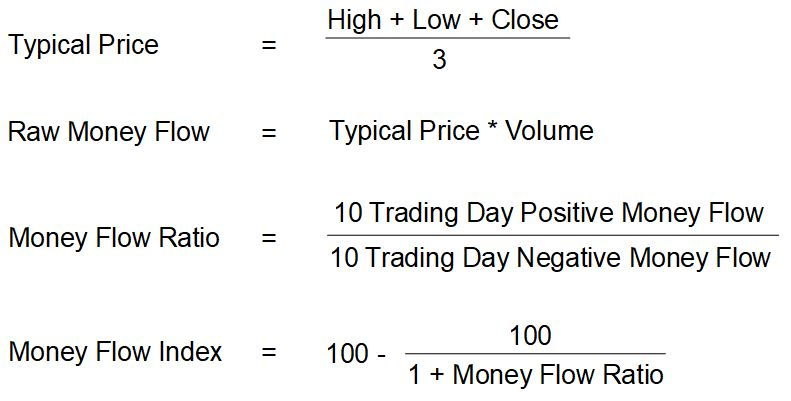

<p style="font-family:Timesnewroman; font-size:180%;" dir="rtl">
:RSI
</p>

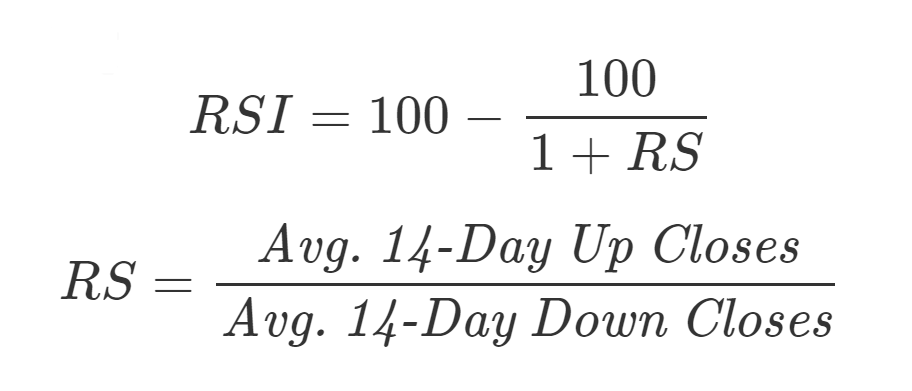

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
We also use (Stochastic %k)/100 to describe the appearance of candelsticks
</p>
<p style="font-family:Timesnewroman; font-size:180%;" dir="rtl">
Stochastic %k = (Current Close - Lowest Low)/(Highest High - Lowest Low)
</p>
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
To describe the past days of a specified candelc we use 3,10,30,50,100,150 and 200 days MAs which are normalized month by month
</p>

In [12]:
d['datep']=[str(datep).split('-')[0] + str(datep).split('-')[1] for datep in d.index.values]

In [13]:
d.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume   datep  
Date                          
2014-09-17  21056800  201409  
2014-09-18  34483200  201409  
2014-09-19  37919700  201409  
2014-09-20  36863600  201409  
2014-09-21  26580100  201409

In [14]:
dateps=set(d['datep'].values)

In [15]:
data=pd.DataFrame()

In [16]:
for i in ([3,10,30,50,100,150,200]):
    index='MA' + str(i)
    data[index]=d['Adj Close'].rolling(window=i).mean()
data

MA3          MA10          MA30          MA50  \
Date                                                                 
2014-09-17           NaN           NaN           NaN           NaN   
2014-09-18           NaN           NaN           NaN           NaN   
2014-09-19    425.523336           NaN           NaN           NaN   
2014-09-20    409.379995           NaN           NaN           NaN   
2014-09-21    400.840332           NaN           NaN           NaN   
...                  ...           ...           ...           ...   
2023-08-11  29462.933594  29282.358398  29615.980078  29959.469102   
2023-08-12  29414.423828  29308.758984  29547.310612  29933.879023   
2023-08-13  29365.531250  29319.182422  29512.272135  29908.563398   
2023-08-14  29369.107422  29352.617578  29482.693359  29887.127031   
2023-08-15  29376.729167  29392.287891  29455.683268  29870.481016   

                   MA100         MA150         MA200  
Date                                                  
2014-09-17           NaN           NaN           NaN  
2014-09-18           NaN           NaN           NaN  
2014-09-19           NaN           NaN           NaN  
2014-09-20           NaN           NaN           NaN  
2014-09-21           NaN           NaN           NaN  
...                  ...           ...           ...  
2023-08-11  28538.769453  28473.834154  27105.922666  
2023-08-12  28544.451992  28507.434180  27139.820146  
2023-08-13  28541.937285  28535.635013  27170.645420  
2023-08-14  28546.975488  28548.865104  27202.523750  
2023-08-15  28556.814004  28565.351445  27234.324258  

[3255 rows x 7 columns]

3241


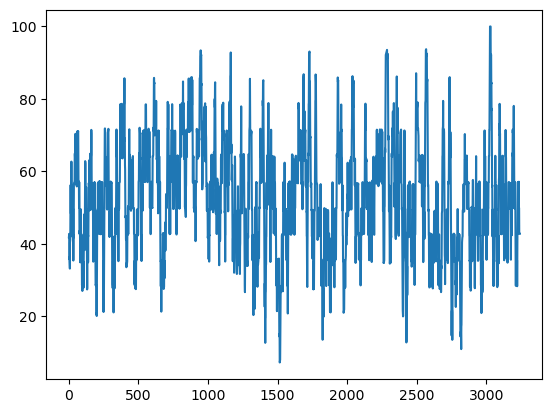

In [17]:
tp=(d['High']+d['Low']+d['Close'])/3
mf=tp*d['Volume']
pmf=[]
nmf=[]
for i in range(1,len(tp)):
    if tp[i] > tp[i-1]:
        pmf.append(tp[i-1])
        nmf.append(0)
    elif tp[i] < tp[i-1]:
        nmf.append(tp[i-1])
        pmf.append(0)
    else:
        pmf.append(0)
        nmf.append(0)
positive_flow=[]
negative_flow=[]
for i in range(period-1,len(pmf)):
    positive_flow.append(sum(pmf[i+1-period:i+1]))
for i in range(period-1,len(nmf)):
    negative_flow.append(sum(nmf[i+1-period:i+1]))
MFI=100*(np.array(positive_flow)/(np.array(positive_flow)+np.array(negative_flow)))
print(len(MFI))
plt.plot(MFI)

In [18]:
data['MFI']=period*[0]+MFI.tolist()

3255


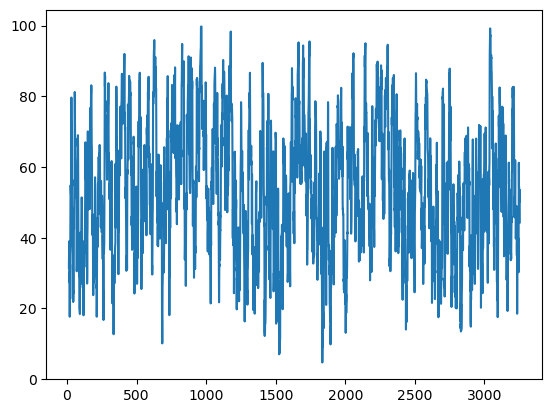

In [19]:
delta=d['Close'].diff(1)
delta.dropna()
up=delta.copy()
down=delta.copy()
up[up<0]=0
down[down>0]=0
avg_gain=up.rolling(window=period).mean()
avg_loss=abs(down.rolling(window=period).mean())
RS = avg_gain/avg_loss
RSI = 100.0 - (100.0/(1.0+RS))
RSI=RSI.values
print(len(RSI))
plt.plot(RSI)

In [20]:
data['RSI']=RSI

In [21]:
data['%k']=(d['Close']-d['Low'])/(d['High']-d['Low'])

In [22]:
data['Volume']=d['Volume']
data['Close']=d['Close']
data['datep']=d['datep']

In [23]:
data=data[199:]
data

MA3          MA10          MA30          MA50  \
Date                                                                 
2015-04-04    253.674672    249.111803    266.058734    259.574362   
2015-04-05    256.205668    250.318402    265.654567    259.639901   
2015-04-06    256.595668    251.164702    264.962268    260.053241   
2015-04-07    256.423330    251.202901    264.256468    260.439981   
2015-04-08    251.231333    251.433801    262.770301    260.468221   
...                  ...           ...           ...           ...   
2023-08-11  29462.933594  29282.358398  29615.980078  29959.469102   
2023-08-12  29414.423828  29308.758984  29547.310612  29933.879023   
2023-08-13  29365.531250  29319.182422  29512.272135  29908.563398   
2023-08-14  29369.107422  29352.617578  29482.693359  29887.127031   
2023-08-15  29376.729167  29392.287891  29455.683268  29870.481016   

                   MA100         MA150         MA200        MFI        RSI  \
Date                                                                         
2015-04-04    255.217931    290.201947    310.843170  56.980315  45.443032   
2015-04-05    254.544671    289.610667    309.859490  56.907749  44.618262   
2015-04-06    253.940961    289.031180    309.014750  49.471878  42.219584   
2015-04-07    253.300371    288.415793    308.306670  49.631620  57.095277   
2015-04-08    252.623891    287.627513    307.487260  49.610664  49.036993   
...                  ...           ...           ...        ...        ...   
2023-08-11  28538.769453  28473.834154  27105.922666  42.736444  51.642408   
2023-08-12  28544.451992  28507.434180  27139.820146  42.745862  51.246025   
2023-08-13  28541.937285  28535.635013  27170.645420  42.738196  50.157083   
2023-08-14  28546.975488  28548.865104  27202.523750  42.748065  53.564953   
2023-08-15  28556.814004  28565.351445  27234.324258  42.763930  44.321474   

                  %k       Volume         Close   datep  
Date                                                     
2015-04-04  0.624581     12493500    253.697006  201504  
2015-04-05  0.991183     19649200    260.597992  201504  
2015-04-06  0.126956     20034200    255.492004  201504  
2015-04-07  0.270831     18467400    253.179993  201504  
2015-04-08  0.083784     30086400    245.022003  201504  
...              ...          ...           ...     ...  
2023-08-11  0.545673  10195168197  29397.714844  202308  
2023-08-12  0.542913   6194358008  29415.964844  202308  
2023-08-13  0.097408   7329897180  29282.914062  202308  
2023-08-14  0.530334  14013695304  29408.443359  202308  
2023-08-15  1.000000  12067782656  29438.830078  202308  

[3056 rows x 13 columns]

In [24]:
s=pd.DataFrame()
dateps=set(data['datep'].values)
for dp in dateps:
    x=data[data['datep']==dp]
    for index in x.columns:
        if index not in ['datep','RSI','MFI','Close','%k']:
            x[index + 'norm']=(x[index]-min(x[index]))/(max(x[index])-min(x[index]))
            x=x.drop(index,axis=1)
    s=pd.concat([s,x])
s['MFI']=s['MFI']/100
s['RSI']=s['RSI']/100
s

MFI       RSI        %k         Close   datep   MA3norm  \
Date                                                                       
2019-01-01  0.492453  0.536172  0.948541   3843.520020  201901  0.609019   
2019-01-02  0.494059  0.547277  0.964986   3943.409424  201901  0.653518   
2019-01-03  0.423583  0.417603  0.096091   3836.741211  201901  0.707545   
2019-01-04  0.424765  0.487787  0.899891   3857.717529  201901  0.715702   
2019-01-05  0.496549  0.443081  0.121972   3845.194580  201901  0.659277   
...              ...       ...       ...           ...     ...       ...   
2023-03-27  0.634637  0.643270  0.372544  27139.888672  202303  0.905753   
2023-03-28  0.566086  0.628046  0.754007  27268.130859  202303  0.896184   
2023-03-29  0.634493  0.688118  0.800643  28348.441406  202303  0.911139   
2023-03-30  0.637875  0.646166  0.217679  28033.562500  202303  0.948882   
2023-03-31  0.567991  0.563755  0.847174  28478.484375  202303  1.000000   

            MA10norm  MA30norm  MA50norm  MA100norm  MA150norm  MA200norm  \
Date                                                                        
2019-01-01  0.832647  0.015235  1.000000   1.000000   1.000000   1.000000   
2019-01-02  0.818016  0.025828  0.872068   0.968734   0.964834   0.968303   
2019-01-03  0.754336  0.000000  0.771377   0.937967   0.929781   0.935928   
2019-01-04  0.765454  0.022296  0.676579   0.906874   0.897199   0.900944   
2019-01-05  0.762267  0.091964  0.584956   0.873492   0.869510   0.865381   
...              ...       ...       ...        ...        ...        ...   
2023-03-27  0.980648  0.732950  0.759685   0.817840   0.818590   0.807294   
2023-03-28  0.985600  0.787191  0.810437   0.860190   0.857994   0.852805   
2023-03-29  0.990676  0.857801  0.867676   0.908176   0.905115   0.904353   
2023-03-30  0.995040  0.929297  0.925027   0.953013   0.951166   0.952780   
2023-03-31  1.000000  1.000000  1.000000   1.000000   1.000000   1.000000   

            Volumenorm  
Date                    
2019-01-01    0.000000  
2019-01-02    0.356190  
2019-01-03    0.079704  
2019-01-04    0.202638  
2019-01-05    0.314698  
...                ...  
2023-03-27    0.161608  
2023-03-28    0.152282  
2023-03-29    0.219047  
2023-03-30    0.259326  
2023-03-31    0.180304  

[3056 rows x 13 columns]

In [25]:
s=s.reset_index()
s=s.sort_values('Date')
s=s.set_index(pd.DatetimeIndex(s['Date'].values))

In [26]:
s=s.drop(['Date'],axis=1)
s

MFI       RSI        %k         Close   datep   MA3norm  \
2015-04-04  0.569803  0.454430  0.624581    253.697006  201504  0.914263   
2015-04-05  0.569077  0.446183  0.991183    260.597992  201504  0.988553   
2015-04-06  0.494719  0.422196  0.126956    255.492004  201504  1.000000   
2015-04-07  0.496316  0.570953  0.270831    253.179993  201504  0.994942   
2015-04-08  0.496107  0.490370  0.083784    245.022003  201504  0.842547   
...              ...       ...       ...           ...     ...       ...   
2023-08-11  0.427364  0.516424  0.545673  29397.714844  202308  0.769924   
2023-08-12  0.427459  0.512460  0.542913  29415.964844  202308  0.678883   
2023-08-13  0.427382  0.501571  0.097408  29282.914062  202308  0.587124   
2023-08-14  0.427481  0.535650  0.530334  29408.443359  202308  0.593835   
2023-08-15  0.427639  0.443215  1.000000  29438.830078  202308  0.608139   

            MA10norm  MA30norm  MA50norm  MA100norm  MA150norm  MA200norm  \
2015-04-04  0.909040  1.000000  0.924970   1.000000   1.000000   1.000000   
2015-04-05  0.956306  0.986778  0.929695   0.938255   0.975745   0.949533   
2015-04-06  0.989459  0.964129  0.959490   0.882888   0.951973   0.906194   
2015-04-07  0.990955  0.941039  0.987368   0.824139   0.926729   0.869867   
2015-04-08  1.000000  0.892420  0.989404   0.762099   0.894393   0.827828   
...              ...       ...       ...        ...        ...        ...   
2023-08-11  0.359205  0.290113  0.951690   0.751543   0.839364   0.746820   
2023-08-12  0.513098  0.165832  0.896116   0.829786   0.898341   0.813658   
2023-08-13  0.573858  0.102417  0.841139   0.795161   0.947840   0.874439   
2023-08-14  0.768756  0.048884  0.794586   0.864533   0.971062   0.937296   
2023-08-15  1.000000  0.000000  0.758436   1.000000   1.000000   1.000000   

            Volumenorm  
2015-04-04    0.004033  
2015-04-05    0.277296  
2015-04-06    0.291998  
2015-04-07    0.232165  
2015-04-08    0.675874  
...                ...  
2023-08-11    0.307322  
2023-08-12    0.000000  
2023-08-13    0.087226  
2023-08-14    0.600642  
2023-08-15    0.451167  

[3056 rows x 13 columns]

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Now we shift Close column for further calculations and also seperate the last line to get signals from it
</p>

In [27]:
data['shifted']=data['Close'].shift(-days)
s['shifted']=s['Close'].shift(-days)

In [28]:
x_pred_unnormalized=data.iloc[-1]
x_pred_normalized=s.iloc[-1]
print(x_pred_unnormalized,86*' ',x_pred_normalized)

MA3        29376.729167
MA10       29392.287891
MA30       29455.683268
MA50       29870.481016
MA100      28556.814004
MA150      28565.351445
MA200      27234.324258
MFI            42.76393
RSI           44.321474
%k                  1.0
Volume      12067782656
Close      29438.830078
datep            202308
shifted             NaN
Name: 2023-08-15 00:00:00, dtype: object                                                                                        MFI               0.427639
RSI               0.443215
%k                     1.0
Close         29438.830078
datep               202308
MA3norm           0.608139
MA10norm               1.0
MA30norm               0.0
MA50norm          0.758436
MA100norm              1.0
MA150norm              1.0
MA200norm              1.0
Volumenorm        0.451167
shifted                NaN
Name: 2023-08-15 00:00:00, dtype: object


In [29]:
data=data[:-1]
data=data.drop('datep',axis=1)
data.tail()

MA3          MA10          MA30          MA50  \
Date                                                                 
2023-08-10  29585.526042  29310.160156  29649.111133  29969.760430   
2023-08-11  29462.933594  29282.358398  29615.980078  29959.469102   
2023-08-12  29414.423828  29308.758984  29547.310612  29933.879023   
2023-08-13  29365.531250  29319.182422  29512.272135  29908.563398   
2023-08-14  29369.107422  29352.617578  29482.693359  29887.127031   

                   MA100         MA150         MA200        MFI        RSI  \
Date                                                                         
2023-08-10  28534.855391  28442.823216  27073.606250  49.902140  54.439288   
2023-08-11  28538.769453  28473.834154  27105.922666  42.736444  51.642408   
2023-08-12  28544.451992  28507.434180  27139.820146  42.745862  51.246025   
2023-08-13  28541.937285  28535.635013  27170.645420  42.738196  50.157083   
2023-08-14  28546.975488  28548.865104  27202.523750  42.748065  53.564953   

                  %k       Volume         Close  shifted  
Date                                                      
2023-08-10  0.224905  11865344789  29429.591797      NaN  
2023-08-11  0.545673  10195168197  29397.714844      NaN  
2023-08-12  0.542913   6194358008  29415.964844      NaN  
2023-08-13  0.097408   7329897180  29282.914062      NaN  
2023-08-14  0.530334  14013695304  29408.443359      NaN

In [30]:
s=s[:-1]
s=s.drop('datep',axis=1)
s.tail()


MFI       RSI        %k         Close   MA3norm  MA10norm  \
2023-08-10  0.499021  0.544393  0.224905  29429.591797  1.000000  0.521266   
2023-08-11  0.427364  0.516424  0.545673  29397.714844  0.769924  0.359205   
2023-08-12  0.427459  0.512460  0.542913  29415.964844  0.678883  0.513098   
2023-08-13  0.427382  0.501571  0.097408  29282.914062  0.587124  0.573858   
2023-08-14  0.427481  0.535650  0.530334  29408.443359  0.593835  0.768756   

            MA30norm  MA50norm  MA100norm  MA150norm  MA200norm  Volumenorm  \
2023-08-10  0.350076  0.974039   0.697650   0.784932   0.683099    0.435617   
2023-08-11  0.290113  0.951690   0.751543   0.839364   0.746820    0.307322   
2023-08-12  0.165832  0.896116   0.829786   0.898341   0.813658    0.000000   
2023-08-13  0.102417  0.841139   0.795161   0.947840   0.874439    0.087226   
2023-08-14  0.048884  0.794586   0.864533   0.971062   0.937296    0.600642   

            shifted  
2023-08-10      NaN  
2023-08-11      NaN  
2023-08-12      NaN  
2023-08-13      NaN  
2023-08-14      NaN

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Let's take a look at our data
</p>
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Attention: s is the final dataframe,data is the final but unnormalized dataframe and d is the initial dataframe
</p>

# S Plot 

TSNE
PCA


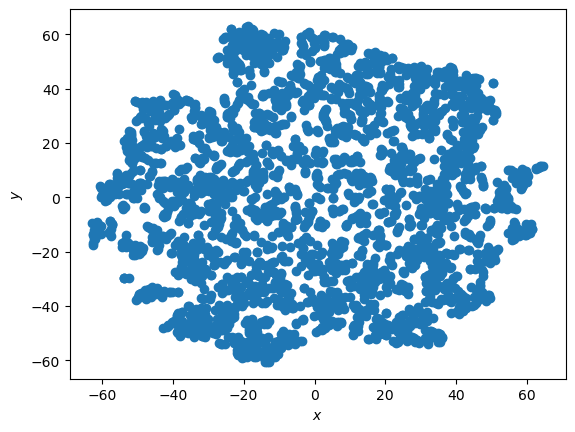

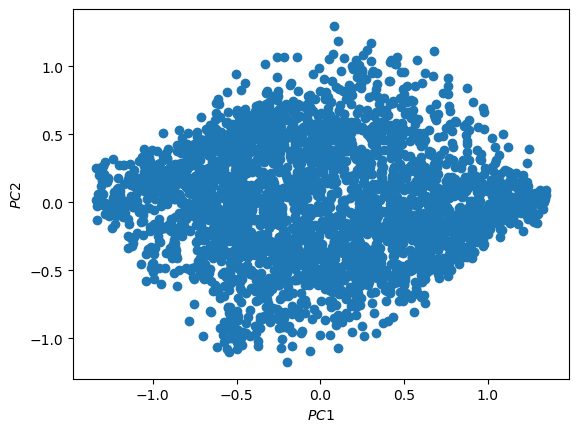

In [31]:
print('TSNE')
from sklearn.manifold import TSNE
d_tsne = TSNE(n_components=2).fit_transform(s.drop(['shifted','Close'],axis=1))
fig = plt.figure()
sub = fig.add_subplot(1, 1, 1, xlabel='$x$', ylabel='$y$')
sub.scatter(d_tsne[:, 0], d_tsne[:, 1])
print('PCA')
from sklearn.decomposition import PCA
d_pca = PCA(n_components=2).fit_transform(s.drop(['Close','shifted'],axis=1))
fig = plt.figure()
sub = fig.add_subplot(1, 1, 1, xlabel='$PC1$', ylabel='$PC2$')
sub.scatter(d_pca[:, 0], d_pca[:, 1])

# Data Plot

TSNE
PCA


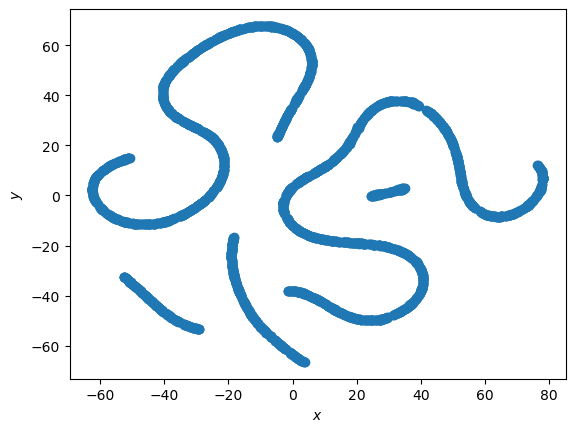

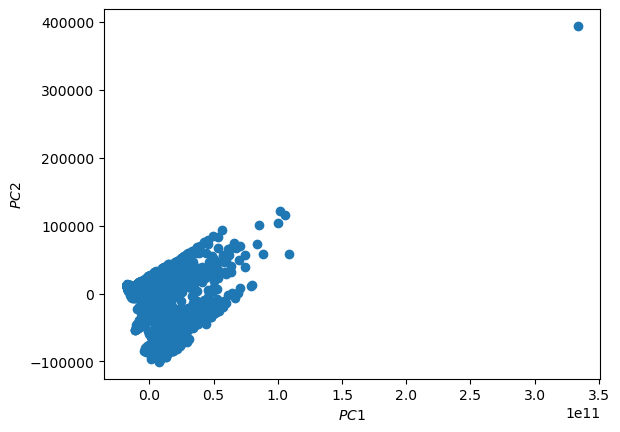

In [32]:
print('TSNE')
from sklearn.manifold import TSNE
d_tsne = TSNE(n_components=2).fit_transform(data.drop(['Close','shifted'],axis=1))
fig = plt.figure()
sub = fig.add_subplot(1, 1, 1, xlabel='$x$', ylabel='$y$')
sub.scatter(d_tsne[:, 0], d_tsne[:, 1])
print('PCA')
from sklearn.decomposition import PCA
d_pca = PCA(n_components=2).fit_transform(data.drop(['Close','shifted'],axis=1))
fig = plt.figure()
sub = fig.add_subplot(1, 1, 1, xlabel='$PC1$', ylabel='$PC2$')
sub.scatter(d_pca[:, 0], d_pca[:, 1])

# D Plot

TSNE
PCA


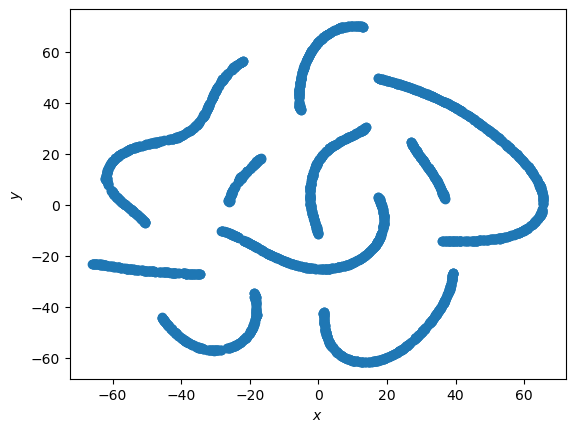

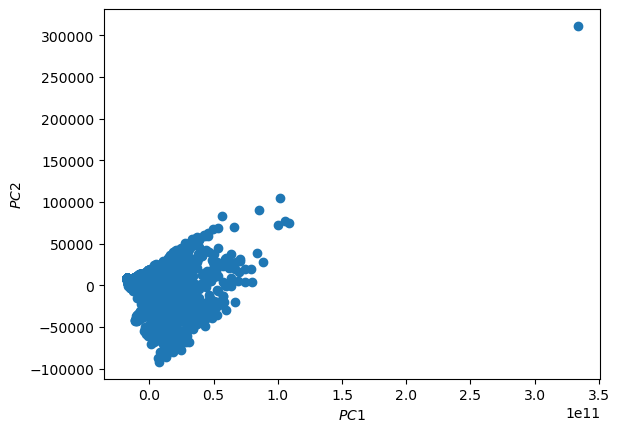

In [33]:
d=d.drop(['Adj Close','datep'],axis=1)
d=d[199:]
print('TSNE')
from sklearn.manifold import TSNE
d_tsne = TSNE(n_components=2).fit_transform(d)
fig = plt.figure()
sub = fig.add_subplot(1, 1, 1, xlabel='$x$', ylabel='$y$')
sub.scatter(d_tsne[:, 0], d_tsne[:, 1])
print('PCA')
from sklearn.decomposition import PCA
d_pca = PCA(n_components=2).fit_transform(d)
fig = plt.figure()
sub = fig.add_subplot(1, 1, 1, xlabel='$PC1$', ylabel='$PC2$')
sub.scatter(d_pca[:, 0], d_pca[:, 1])

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
As you can notice, our datas shape interesting patterns
</p>
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
We will take three different approachs to investigate these patterns
</p>

# First approach

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
First we use Kmeans to classify normalized data and then use this classification to describe unnormalized data
</p>

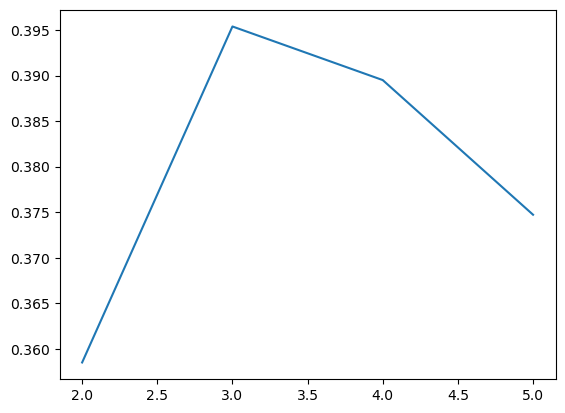

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ss = []
scaled_X1=TSNE(n_components=2).fit_transform(s.drop(['shifted','Close'],axis=1))
for i in range(2,6):
    km = KMeans(n_clusters = i)
    km.fit(scaled_X1)
    ss.append(silhouette_score(scaled_X1, km.labels_, metric='euclidean'))
plt.plot(list(range(2,6)),ss)

[2 2 2 ... 2 2 2]
          T0         T1  group
0 -33.256821 -46.791615      2
1 -37.027340 -46.662964      2
2 -27.886694 -44.417835      2
3 -28.514187 -43.182270      2
4 -42.629890 -25.856586      2


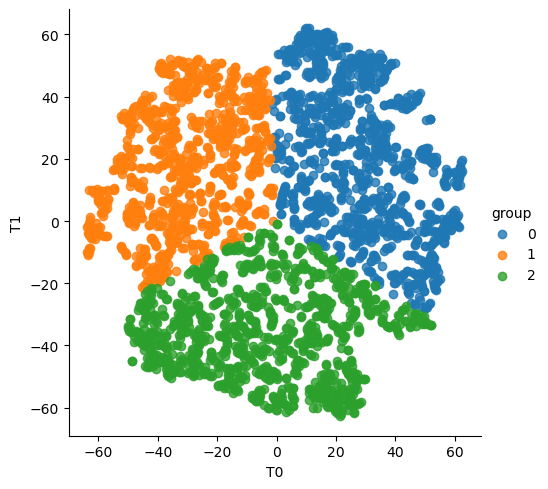

In [35]:
km = KMeans(n_clusters = 3)
km.fit(scaled_X1)
print(km.labels_)
scaled_X1=pd.DataFrame(scaled_X1)
scaled_X1.columns=['T0','T1']
scaled_X1['group']=km.labels_
print(scaled_X1.head())
import seaborn as sns
sns.lmplot(x='T0', y='T1', data=scaled_X1, hue='group', fit_reg=False)


          T0         T1  group
0 -33.256821 -46.791615      2
1 -37.027340 -46.662964      2
2 -27.886694 -44.417835      2
3 -28.514187 -43.182270      2
4 -42.629890 -25.856586      2


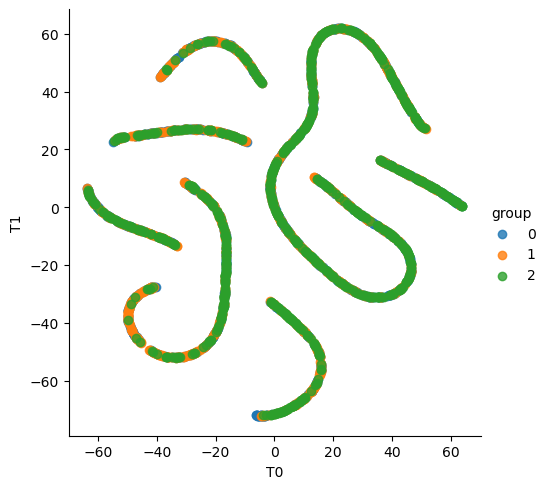

In [36]:
scaled_data=TSNE(n_components=2).fit_transform(data.drop(['Close','shifted'],axis=1))
scaled_data=pd.DataFrame(scaled_data)
scaled_data.columns=['T0','T1']
km = KMeans(n_clusters = 3)
km.fit(scaled_X1)
scaled_data['group']=km.labels_
print(scaled_X1.head())
import seaborn as sns
sns.lmplot(x='T0', y='T1', data=scaled_data, hue='group', fit_reg=False)

In [37]:
data['group']=km.labels_
data.head()

MA3        MA10        MA30        MA50       MA100  \
Date                                                                     
2015-04-04  253.674672  249.111803  266.058734  259.574362  255.217931   
2015-04-05  256.205668  250.318402  265.654567  259.639901  254.544671   
2015-04-06  256.595668  251.164702  264.962268  260.053241  253.940961   
2015-04-07  256.423330  251.202901  264.256468  260.439981  253.300371   
2015-04-08  251.231333  251.433801  262.770301  260.468221  252.623891   

                 MA150      MA200        MFI        RSI        %k    Volume  \
Date                                                                          
2015-04-04  290.201947  310.84317  56.980315  45.443032  0.624581  12493500   
2015-04-05  289.610667  309.85949  56.907749  44.618262  0.991183  19649200   
2015-04-06  289.031180  309.01475  49.471878  42.219584  0.126956  20034200   
2015-04-07  288.415793  308.30667  49.631620  57.095277  0.270831  18467400   
2015-04-08  287.627513  307.48726  49.610664  49.036993  0.083784  30086400   

                 Close     shifted  group  
Date                                       
2015-04-04  253.697006  236.552002      1  
2015-04-05  260.597992  236.153000      1  
2015-04-06  255.492004  224.587006      1  
2015-04-07  253.179993  219.158997      1  
2015-04-08  245.022003  223.832993      1

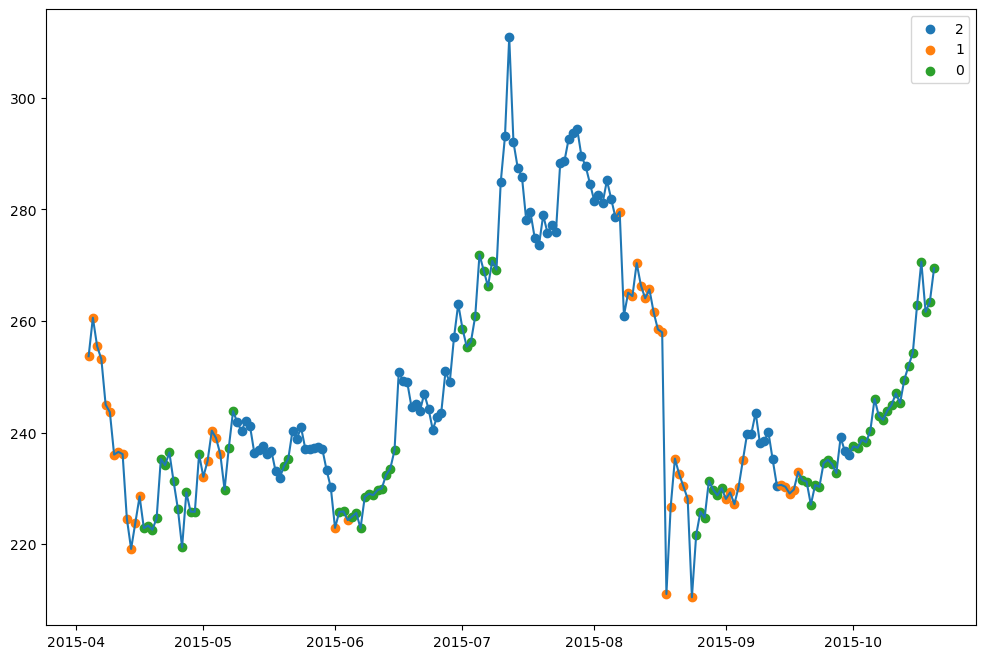

In [38]:
plt.figure(figsize = (12, 8))
plt.plot(data[:200].index,data[:200]['Close'])
plt.scatter(data[:200][data[:200]['group']==2].index,data[:200][data[:200]['group']==2]['Close'],label=2)
plt.scatter(data[:200][data[:200]['group']==1].index,data[:200][data[:200]['group']==1]['Close'],label=1)
plt.scatter(data[:200][data[:200]['group']==0].index,data[:200][data[:200]['group']==0]['Close'],label=0)
plt.legend()

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
As noticed, this classification does not form any particular pattern
</p>

# Second approach

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Now we examine if datas (from normalized PCA method dataframe) form any natural pattern based on the distance from the center line or not 
</p>

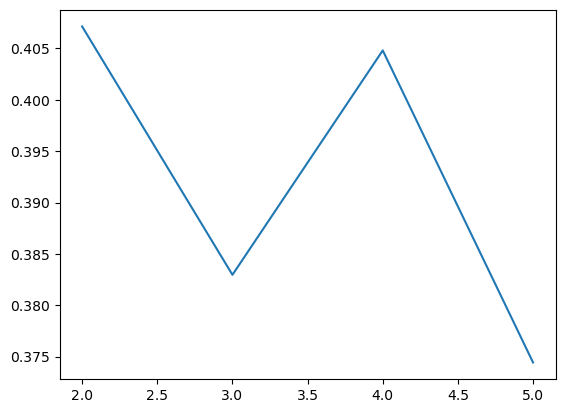

In [39]:
ss = []
scaled_X2=PCA(n_components=2).fit_transform(s.drop(['shifted','Close'],axis=1))
for i in range(2,6):
    km = KMeans(n_clusters = i)
    km.fit(scaled_X2)
    ss.append(silhouette_score(scaled_X2, km.labels_, metric='euclidean'))
plt.plot(list(range(2,6)),ss)

[2 2 2 ... 1 1 2]
         T0        T1  group
0 -1.219817 -0.102617      2
1 -1.192960  0.084046      2
2 -1.234047  0.073935      2
3 -1.170790  0.132735      2
4 -1.096425  0.166767      2


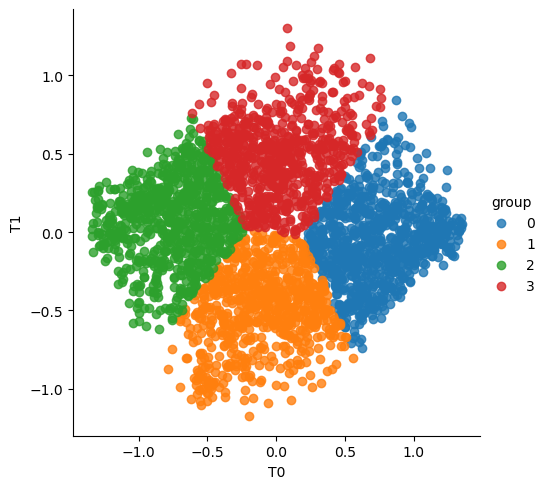

In [40]:
km = KMeans(n_clusters = 4)
km.fit(scaled_X2)
print(km.labels_)
scaled_X2=pd.DataFrame(scaled_X2)
scaled_X2.columns=['T0','T1']
scaled_X2['group']=km.labels_
print(scaled_X2.head())
import seaborn as sns
sns.lmplot(x='T0', y='T1', data=scaled_X2, hue='group', fit_reg=False)

# Third approach

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Here we use DBScan to classify unnormalized data and examine how this classification looks when applied to normalized data
</p>

7


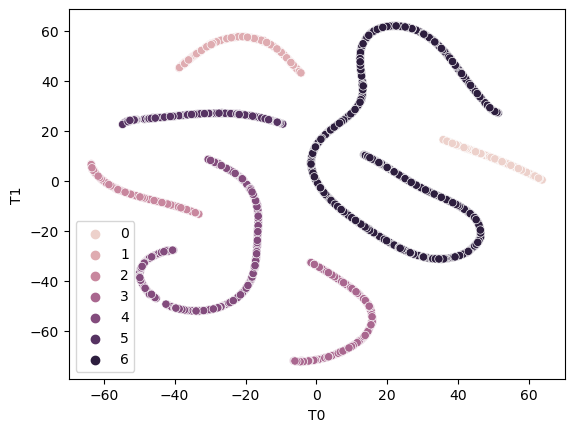

In [41]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 4)
clusters = dbscan.fit_predict(scaled_data)
length = len(np.unique(clusters))
sns.scatterplot(scaled_data['T0'], scaled_data['T1'], hue=clusters)
print(length)

          T0         T1  group
0 -33.256821 -46.791615      0
1 -37.027340 -46.662964      0
2 -27.886694 -44.417835      0
3 -28.514187 -43.182270      0
4 -42.629890 -25.856586      0


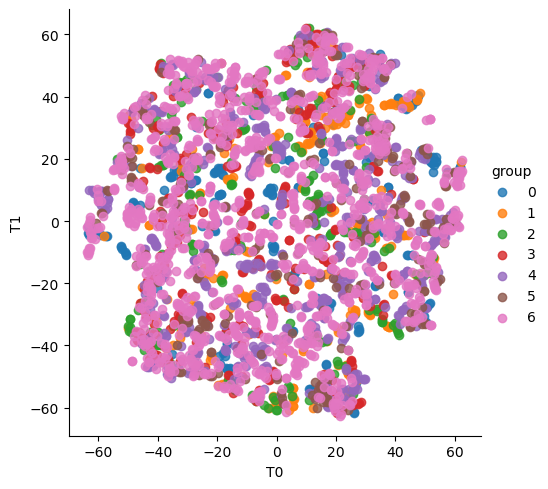

In [42]:
scaled_X1['group']=clusters
print(scaled_X1.head())
sns.lmplot(x='T0', y='T1', data=scaled_X1, hue='group', fit_reg=False)

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
.As we couldn't use any unsupervised method to have a meaningful classification, Let's move on to supervised methods
</p>

# Supervised learning methods

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
.First we group our normalized datas by their return in a week
</p>
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
.If a day's return is more than i*(mean of positive returns) it goes to Buy group
</p>
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
.If a day's return is less than i*(mean of negative returns) it goes to Sell group
</p>
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
.If a day's return does not meet the qualifications of neither Buy nor Sell group, its label would be Hold
</p>

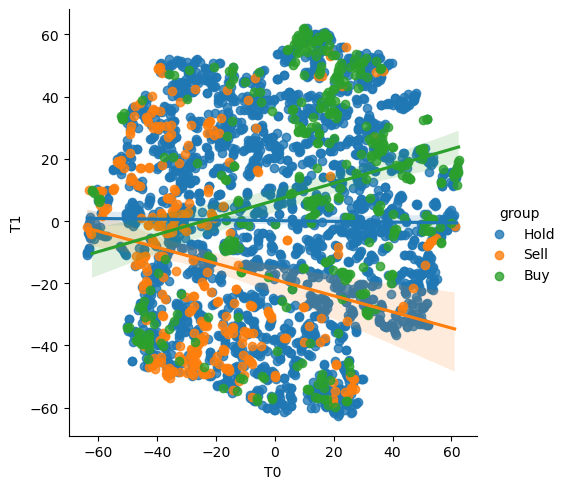

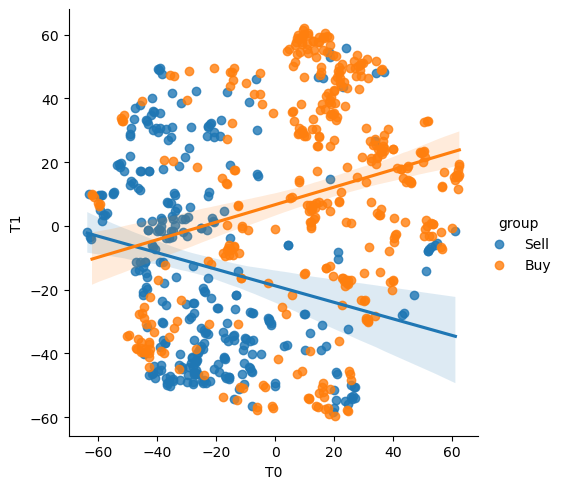

In [43]:
i=1.5
s['return']=(s['shifted']-s['Close'])/s['Close']
y=[]
for c in s['return']:
    if c>=0 and c>=i*np.mean(s['return'][s['return'] >0].values):
        y.append('Buy')
    elif c <0 and c<=i*np.mean(s['return'][s['return'] <0].values):
        y.append('Sell')
    else:
        y.append('Hold')
scaled_X1['group']=y
sns.lmplot(x='T0', y='T1', data=scaled_X1, hue='group', fit_reg=True)
sns.lmplot(x='T0', y='T1', data=scaled_X1[scaled_X1['group']!='Hold'], hue='group', fit_reg=True)

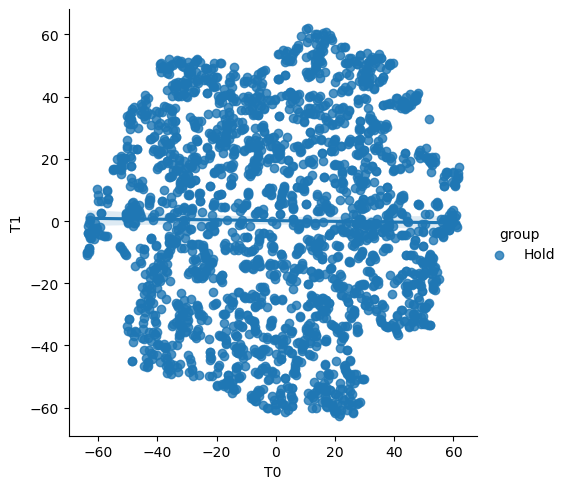

In [44]:
s['return']=(s['shifted']-s['Close'])/s['Close']
y=[]
for c in s['return']:
    if c>=0 and c>=i*np.mean(s['return'][s['return'] >0].values):
        y.append('Buy')
    elif c <0 and c<=i*np.mean(s['return'][s['return'] <0].values):
        y.append('Sell')
    else:
        y.append('Hold')
scaled_X1['group']=y
sns.lmplot(x='T0', y='T1', data=scaled_X1[scaled_X1['group']=='Hold'], hue='group', fit_reg=True)

In [45]:
scaled_X1_3D=TSNE(n_components=3).fit_transform(s.drop(['shifted','Close','return'],axis=1))
scaled_X1_3D=pd.DataFrame(scaled_X1_3D)
scaled_X1_3D.columns=['T0','T1','T2']
scaled_X1_3D['group']=scaled_X1['group']

In [46]:
scaled_X1_3D

T0        T1         T2 group
0    -12.442523  0.023498  -9.231063  Hold
1    -14.997784  0.400830  -8.365913  Hold
2    -11.041221 -3.555399 -13.036242  Sell
3    -10.565734 -3.272149 -12.324162  Sell
4    -11.103669 -7.672935 -11.258939  Hold
...         ...       ...        ...   ...
3050  -9.526937  3.568515   4.059728  Hold
3051  -9.694236  3.057286   2.828199  Hold
3052 -10.061339  3.162547   2.041290  Hold
3053  -9.264044  5.768070   2.012597  Hold
3054 -11.874003  3.536962   2.489035  Hold

[3055 rows x 4 columns]

In [47]:
colors=[]
for g in scaled_X1_3D['group']:
    if g=='Sell':
        colors.append('red')
    elif g=='Buy':
        colors.append('blue')
    else:
        colors.append('black')
colors[:5]

['black', 'black', 'red', 'red', 'black']

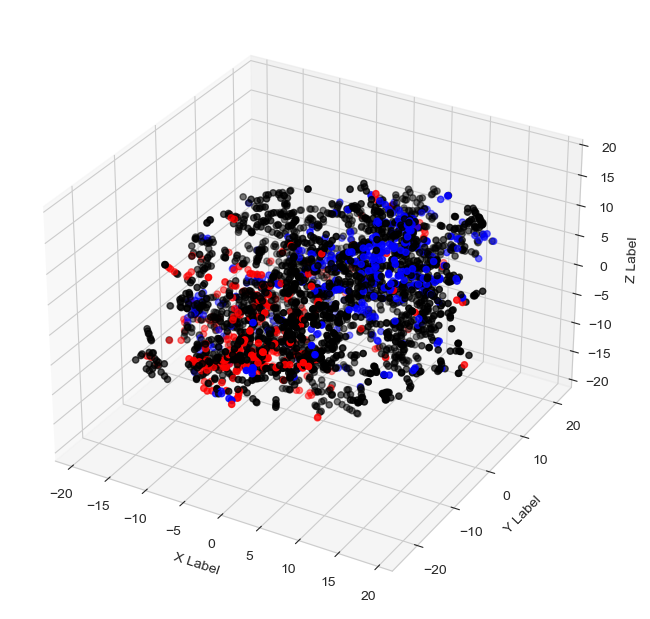

In [48]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig)

x = scaled_X1_3D['T0']
y = scaled_X1_3D['T1']
z = scaled_X1_3D['T2']
ax.scatter(x, y, z, c=colors, marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
.As noticed Buy and Sell groups are on opposite sides of the plot and Hold group is distributed accross the plot
</p>

In [49]:
s=s.drop(['shifted','return'],axis=1)
s['group']=scaled_X1_3D['group'].tolist()
s.head()

MFI       RSI        %k       Close   MA3norm  MA10norm  \
2015-04-04  0.569803  0.454430  0.624581  253.697006  0.914263  0.909040   
2015-04-05  0.569077  0.446183  0.991183  260.597992  0.988553  0.956306   
2015-04-06  0.494719  0.422196  0.126956  255.492004  1.000000  0.989459   
2015-04-07  0.496316  0.570953  0.270831  253.179993  0.994942  0.990955   
2015-04-08  0.496107  0.490370  0.083784  245.022003  0.842547  1.000000   

            MA30norm  MA50norm  MA100norm  MA150norm  MA200norm  Volumenorm  \
2015-04-04  1.000000  0.924970   1.000000   1.000000   1.000000    0.004033   
2015-04-05  0.986778  0.929695   0.938255   0.975745   0.949533    0.277296   
2015-04-06  0.964129  0.959490   0.882888   0.951973   0.906194    0.291998   
2015-04-07  0.941039  0.987368   0.824139   0.926729   0.869867    0.232165   
2015-04-08  0.892420  0.989404   0.762099   0.894393   0.827828    0.675874   

           group  
2015-04-04  Hold  
2015-04-05  Hold  
2015-04-06  Sell  
2015-04-07  Sell  
2015-04-08  Hold

In [50]:
from sklearn.model_selection import train_test_split
s_x=s.drop(['group','Close'],axis=1)
s_y=s['group'].tolist()
split=int(0.8*len(s))
x_train,x_test,y_train,y_test=s_x[:split],s_x[split:],s_y[:split],s_y[split:]
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size = 0.2,random_state = 0)

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
:At this point we will inspect some models such as
</p>
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Neural Network, KNN, Logestic Regression
</p>

# Neural Network

<p style="font-family:Timesnewroman; font-size:180%;" dir="rtl">
Finding the right number of neurons in each layer
</p>

In [51]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
ACC = []
for i in range(2,13):
    for j in range(2,13):
        nn = MLPClassifier(hidden_layer_sizes = (i, j),random_state = 0)
        nn.fit(x_train, y_train)
        y_pred = nn.predict(x_val)
        ACC.append(accuracy_score(y_val, y_pred))
        print(i,j, accuracy_score(y_val, y_pred))

2 2 0.7280163599182005
2 3 0.7280163599182005
2 4 0.7280163599182005
2 5 0.7280163599182005
2 6 0.7280163599182005
2 7 0.7280163599182005
2 8 0.7280163599182005
2 9 0.7239263803680982
2 10 0.7280163599182005
2 11 0.7280163599182005
2 12 0.7259713701431493
3 2 0.7280163599182005
3 3 0.7280163599182005
3 4 0.7280163599182005
3 5 0.7300613496932515
3 6 0.7280163599182005
3 7 0.7280163599182005
3 8 0.7259713701431493
3 9 0.7280163599182005
3 10 0.721881390593047
3 11 0.7259713701431493
3 12 0.721881390593047
4 2 0.7280163599182005
4 3 0.7280163599182005
4 4 0.7321063394683026
4 5 0.7239263803680982
4 6 0.7280163599182005
4 7 0.7280163599182005
4 8 0.7300613496932515
4 9 0.7300613496932515
4 10 0.7341513292433538
4 11 0.7280163599182005
4 12 0.7198364008179959
5 2 0.7280163599182005
5 3 0.7321063394683026
5 4 0.7259713701431493
5 5 0.7239263803680982
5 6 0.7239263803680982
5 7 0.7280163599182005
5 8 0.7341513292433538
5 9 0.721881390593047
5 10 0.7259713701431493
5 11 0.7177914110429447
5 1

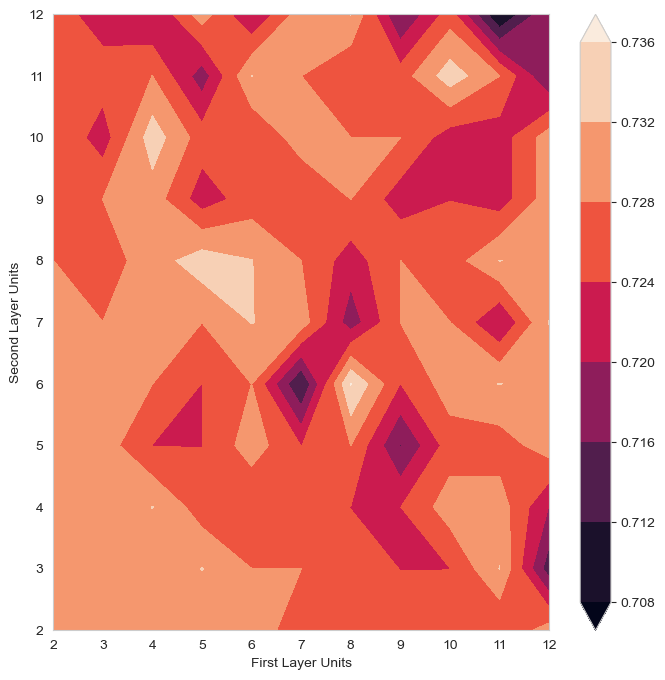

In [52]:
x, y = np.meshgrid(range(2,13), range(2,13))
z = np.array(ACC).reshape(len(x), len(y))
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(y, x, z, origin='upper', extend='both')
fig.colorbar(ax)
plt.xlabel("First Layer Units")
plt.ylabel("Second Layer Units")
plt.yticks(range(2,13))
plt.xticks(range(2,13))
plt.show()

<p style="font-family:Timesnewroman; font-size:180%;" dir="rtl">
Finding the best solver
</p>

In [53]:
ACC = []
solvers = ['lbfgs', 'sgd', 'adam']
for solver in solvers:
    nn = MLPClassifier(solver = solver,hidden_layer_sizes = (12, 4),random_state = 0)
    nn.fit(x_train, y_train)
    y_pred = nn.predict(x_val)
    ACC.append(accuracy_score(y_val, y_pred))
    print(solver, accuracy_score(y_val, y_pred))

lbfgs 0.7402862985685071
sgd 0.7280163599182005
adam 0.7198364008179959


<p style="font-family:Timesnewroman; font-size:180%;" dir="rtl">
Finding the best activation function
</p>

In [54]:
ACC = []
activations = ['identity', 'logistic', 'tanh', 'relu']
for function in activations:
    nn = MLPClassifier(activation = function,solver = 'adam',hidden_layer_sizes = (12, 4),random_state = 0)
    nn.fit(x_train, y_train)
    y_pred = nn.predict(x_val)
    ACC.append(accuracy_score(y_val, y_pred))
    print(function, accuracy_score(y_val, y_pred))

identity 0.7239263803680982
logistic 0.7280163599182005
tanh 0.7239263803680982
relu 0.7198364008179959


<p style="font-family:Timesnewroman; font-size:180%;" dir="rtl">
Finding the best initial learning rate
</p>

In [55]:
ACC = []
rates = [0.001, 0.01, 0.05, 0.1, 0.5, 1]
for rate in rates:
    nn = MLPClassifier(learning_rate_init = rate,activation = 'relu',solver = 'adam',hidden_layer_sizes = (12, 2),random_state = 0)
    nn.fit(x_train, y_train)
    y_pred = nn.predict(x_val)
    ACC.append(accuracy_score(y_val, y_pred))
    print(rate, accuracy_score(y_val, y_pred))

0.001 0.7300613496932515
0.01 0.7137014314928425
0.05 0.7034764826175869
0.1 0.7280163599182005
0.5 0.7280163599182005
1 0.7280163599182005


In [56]:
nn = MLPClassifier(learning_rate_init = 0.01,activation = 'relu',solver = 'adam',hidden_layer_sizes = (12, 2),random_state = 0)
nn.fit(x_train, y_train)
y_pred = nn.predict(x_test)
acc_nn = accuracy_score(y_test, y_pred)
print("Best Neural Network accuracy is: ", acc_nn)

Best Neural Network accuracy is:  0.8101472995090017


# KNN

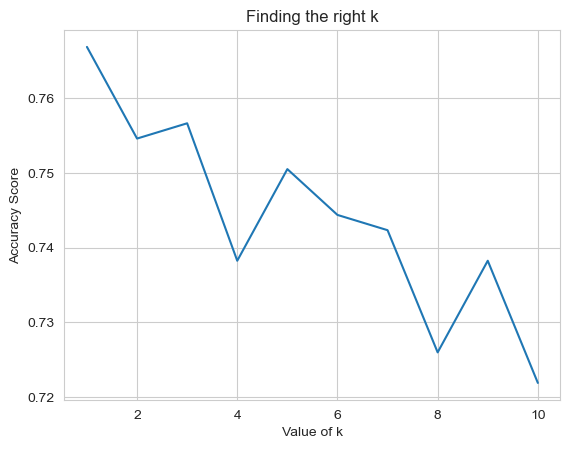

In [57]:
from sklearn.neighbors import KNeighborsClassifier  
ACC = []
for N in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = N) 
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_val)
    ACC.append(accuracy_score(y_val, y_pred))
plt.plot(list(range(1,11)),ACC)
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.grid()

In [58]:
knn = KNeighborsClassifier(n_neighbors = np.argmax(ACC)+1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn = accuracy_score(y_test, y_pred)
print("Best KNN accuracy is: ", acc_knn)

Best KNN accuracy is:  0.679214402618658


# Logistic Regression

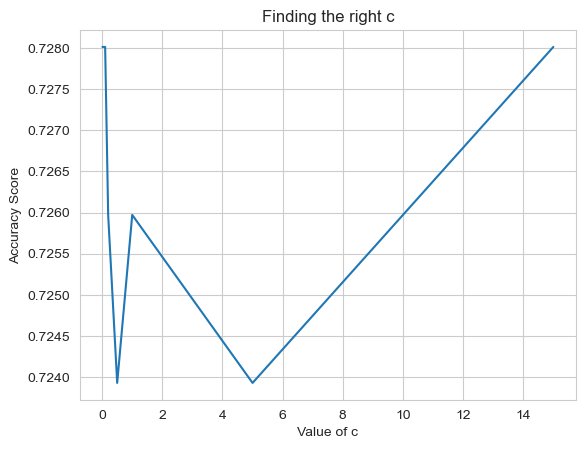

In [59]:
from sklearn.linear_model import LogisticRegression
C = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10, 15]
ACC = []
for c in C:
    logReg = LogisticRegression(C = c,multi_class = 'multinomial',solver = 'sag',random_state = 0) 
    logReg.fit(x_train, y_train)
    y_pred = logReg.predict(x_val)
    ACC.append(accuracy_score(y_val, y_pred))
plt.plot(C,ACC)
plt.xlabel("Value of c")
plt.ylabel("Accuracy Score")
plt.title("Finding the right c")
plt.grid()

In [60]:
logreg = LogisticRegression(C = 10,multi_class = 'multinomial',solver = 'sag',random_state = 0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = accuracy_score(y_test, y_pred)
print("Best logreg accuracy is: ", acc_logreg)

Best logreg accuracy is:  0.855973813420622


<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
We could reach 0.86 accuracy score but, using bayes' theorem we can calculate P(A|B)=0.48, where
</p>
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
A = The group of a specific day being Buy & B = The model predicted Buy as the group of that day 
</p>

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
:So now we'll search for a better algorithm
</p>
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
First we seperate Hold group datas from the others and then we will seperate Buy and Sell groups, final accuracy score will be accuracy score of the first part * accuracy score of the second part
</p>

# First part

In [61]:
Y_test=[x!='Hold' for x in y_test]
Y_train=[x!='Hold' for x in y_train]
Y_val=[x!='Hold' for x in y_val]

# Neural Network

Best Neural Network accuracy is:  0.7872340425531915
Neural Network accuracy is:  0.7761047463175123


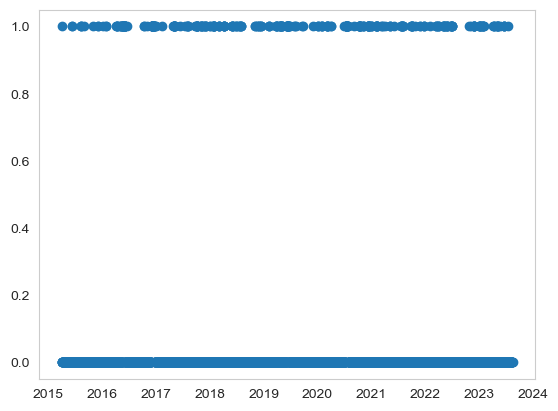

In [62]:
nn = MLPClassifier(learning_rate_init = 0.01,activation = 'relu',solver = 'adam',hidden_layer_sizes = (12, 4),random_state = 0)
nn.fit(x_train, Y_train)
y_pred = nn.predict(x_test)
acc_nn = accuracy_score(Y_test, y_pred)
print("Best Neural Network accuracy is: ", acc_nn)
y_pred = nn.predict(s_x)
acc_nn = accuracy_score([y!='Hold' for y in s_y], y_pred)
print("Neural Network accuracy is: ", acc_nn)
plt.scatter(s.index,nn.predict(s_x))

# KNN

Best KNN accuracy is:  0.6890343698854338
KNN accuracy is:  0.9011456628477905


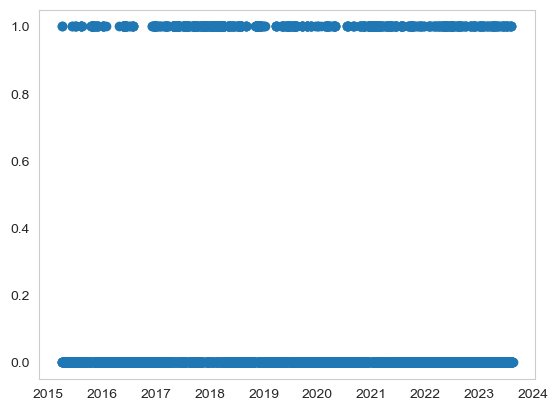

In [63]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, Y_train)
y_pred = knn.predict(x_test)
acc_knn = accuracy_score(Y_test, y_pred)
print("Best KNN accuracy is: ", acc_knn)
y_pred = knn.predict(s_x)
acc_nn = accuracy_score([y!='Hold' for y in s_y], y_pred)
print("KNN accuracy is: ", acc_nn)
plt.scatter(s.index,knn.predict(s_x))

# Logestic Regression

Best logreg accuracy is:  0.8494271685761048
logreg accuracy is:  0.7643207855973814


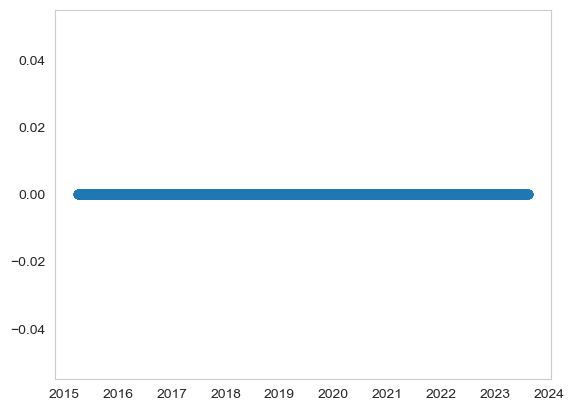

In [64]:
logreg = LogisticRegression(C = 10,multi_class = 'multinomial',solver = 'sag',random_state = 0)
logreg.fit(x_train, Y_train)
y_pred = logreg.predict(x_test)
acc_logreg = accuracy_score(Y_test, y_pred)
print("Best logreg accuracy is: ", acc_logreg)
y_pred = logreg.predict(s_x)
acc_logreg = accuracy_score([y!='Hold' for y in s_y], y_pred)
print("logreg accuracy is: ", acc_logreg)
plt.scatter(s.index,logreg.predict(s_x))

[[2158  177]
 [ 125  595]]


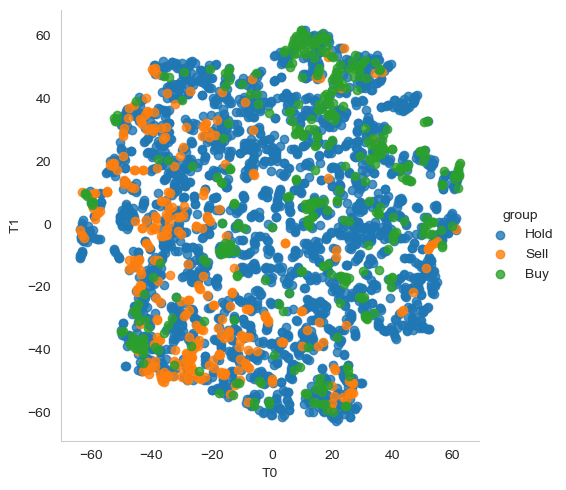

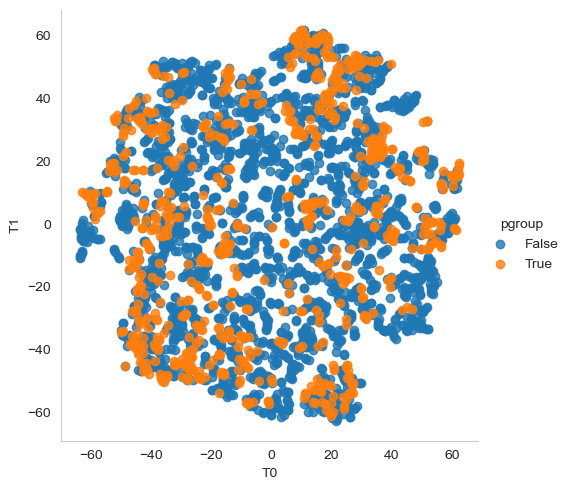

In [65]:
sns.lmplot(x='T0', y='T1', data=scaled_X1, hue='group', fit_reg=False)
scaled_X1['pgroup']=knn.predict(s_x)
sns.lmplot(x='T0', y='T1', data=scaled_X1, hue='pgroup', fit_reg=False)
from sklearn.metrics import confusion_matrix
print(confusion_matrix([y!='Hold' for y in s_y],knn.predict(s_x)))


In [66]:
s['primgroup']=knn.predict(s_x)
s

MFI       RSI        %k         Close   MA3norm  MA10norm  \
2015-04-04  0.569803  0.454430  0.624581    253.697006  0.914263  0.909040   
2015-04-05  0.569077  0.446183  0.991183    260.597992  0.988553  0.956306   
2015-04-06  0.494719  0.422196  0.126956    255.492004  1.000000  0.989459   
2015-04-07  0.496316  0.570953  0.270831    253.179993  0.994942  0.990955   
2015-04-08  0.496107  0.490370  0.083784    245.022003  0.842547  1.000000   
...              ...       ...       ...           ...       ...       ...   
2023-08-10  0.499021  0.544393  0.224905  29429.591797  1.000000  0.521266   
2023-08-11  0.427364  0.516424  0.545673  29397.714844  0.769924  0.359205   
2023-08-12  0.427459  0.512460  0.542913  29415.964844  0.678883  0.513098   
2023-08-13  0.427382  0.501571  0.097408  29282.914062  0.587124  0.573858   
2023-08-14  0.427481  0.535650  0.530334  29408.443359  0.593835  0.768756   

            MA30norm  MA50norm  MA100norm  MA150norm  MA200norm  Volumenorm  \
2015-04-04  1.000000  0.924970   1.000000   1.000000   1.000000    0.004033   
2015-04-05  0.986778  0.929695   0.938255   0.975745   0.949533    0.277296   
2015-04-06  0.964129  0.959490   0.882888   0.951973   0.906194    0.291998   
2015-04-07  0.941039  0.987368   0.824139   0.926729   0.869867    0.232165   
2015-04-08  0.892420  0.989404   0.762099   0.894393   0.827828    0.675874   
...              ...       ...        ...        ...        ...         ...   
2023-08-10  0.350076  0.974039   0.697650   0.784932   0.683099    0.435617   
2023-08-11  0.290113  0.951690   0.751543   0.839364   0.746820    0.307322   
2023-08-12  0.165832  0.896116   0.829786   0.898341   0.813658    0.000000   
2023-08-13  0.102417  0.841139   0.795161   0.947840   0.874439    0.087226   
2023-08-14  0.048884  0.794586   0.864533   0.971062   0.937296    0.600642   

           group  primgroup  
2015-04-04  Hold      False  
2015-04-05  Hold      False  
2015-04-06  Sell       True  
2015-04-07  Sell       True  
2015-04-08  Hold      False  
...          ...        ...  
2023-08-10  Hold      False  
2023-08-11  Hold      False  
2023-08-12  Hold      False  
2023-08-13  Hold      False  
2023-08-14  Hold      False  

[3055 rows x 14 columns]

# Second part

MFI       RSI        %k         Close   MA3norm  MA10norm  \
2015-04-06  0.494719  0.422196  0.126956    255.492004  1.000000  0.989459   
2015-04-07  0.496316  0.570953  0.270831    253.179993  0.994942  0.990955   
2015-06-12  0.425792  0.382576  0.383595    229.981995  0.157145  0.049017   
2015-06-13  0.498940  0.483719  0.927368    232.401993  0.194754  0.078218   
2015-07-04  0.566425  0.655379  0.921315    260.885986  0.018024  0.108600   
...              ...       ...       ...           ...       ...       ...   
2023-07-27  0.282861  0.184940  0.241192  29210.689453  0.007043  0.197057   
2023-07-31  0.498266  0.319587  0.275006  29230.111328  0.021491  0.000000   
2023-08-01  0.569934  0.466442  1.000000  29675.732422  0.640022  0.993556   
2023-08-03  0.570197  0.399962  0.526625  29178.679688  0.530682  0.450970   
2023-08-06  0.498715  0.302218  0.396072  29041.855469  0.000000  0.080832   

            MA30norm  MA50norm  MA100norm  MA150norm  MA200norm  Volumenorm  \
2015-04-06  0.964129  0.959490   0.882888   0.951973   0.906194    0.291998   
2015-04-07  0.941039  0.987368   0.824139   0.926729   0.869867    0.232165   
2015-06-12  0.047456  0.000000   0.667691   0.007974   0.578214    0.100693   
2015-06-13  0.022443  0.005347   0.617662   0.113044   0.540895    0.079698   
2015-07-04  0.078582  0.043121   0.026944   0.063669   0.731034    0.003385   
...              ...       ...        ...        ...        ...         ...   
2023-07-27  0.921313  0.868940   0.877687   0.879009   0.883393    0.249298   
2023-07-31  0.862282  1.000000   0.995544   1.000000   1.000000    0.300797   
2023-08-01  1.000000  0.000000   0.000000   0.000000   0.000000    0.927774   
2023-08-03  0.782614  0.316511   0.343911   0.157567   0.162411    0.505903   
2023-08-06  0.564968  0.696276   0.333078   0.425035   0.400387    0.082611   

           group  primgroup  
2015-04-06  Sell       True  
2015-04-07  Sell       True  
2015-06-12  Hold       True  
2015-06-13  Hold       True  
2015-07-04   Buy       True  
...          ...        ...  
2023-07-27  Hold       True  
2023-07-31  Hold       True  
2023-08-01  Hold       True  
2023-08-03  Hold       True  
2023-08-06  Hold       True  

[772 rows x 14 columns]

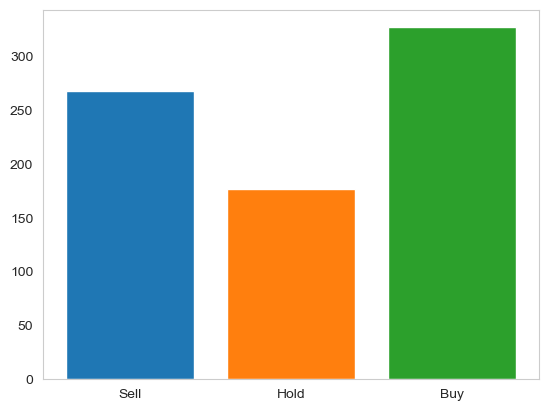

In [67]:
S=s[s['primgroup'] != False]
for g in ['Sell','Hold','Buy']:
    plt.bar(g,S['group'].tolist().count(g))
S

In [68]:
S_x=S.drop(['group','Close'],axis=1)
S_y=S['group'].tolist()
split=int(0.8*len(S))
x_train, x_test, y_train, y_test = train_test_split(S_x, S_y,test_size = 0.2,random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size = 0.2,random_state = 0)

# KNN

In [69]:
ACC = []
for N in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = N) 
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_val)
    ACC.append(accuracy_score(y_val, y_pred))
knn = KNeighborsClassifier(n_neighbors = np.argmax(ACC)+1)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
acc_knn1 = accuracy_score(y_test, y_pred)
print("Best KNN accuracy is: ", acc_knn1)
y_pred = knn.predict(S_x)
acc_knn2 = accuracy_score(S_y, y_pred)
print("KNN accuracy is: ", acc_knn2)

Best KNN accuracy is:  0.6774193548387096
KNN accuracy is:  0.7098445595854922


# Logestic Regression

In [70]:
C = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10, 15]
ACC = []
for c in C:
    logReg = LogisticRegression(C = c,multi_class = 'multinomial',solver = 'sag',random_state = 0) 
    logReg.fit(x_train, y_train)
    y_pred = logReg.predict(x_val)
    ACC.append(accuracy_score(y_val, y_pred))
logreg = LogisticRegression(C = C[np.argmax(ACC)],multi_class = 'multinomial',solver = 'sag',random_state = 0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg1 = accuracy_score(y_test, y_pred)
print("Best logreg accuracy is: ", acc_logreg1)
y_pred = logreg.predict(S_x)
acc_logreg2 = accuracy_score(S_y, y_pred)
print("logreg accuracy is: ", acc_logreg2)

Best logreg accuracy is:  0.6516129032258065
logreg accuracy is:  0.6476683937823834


# Neural Network

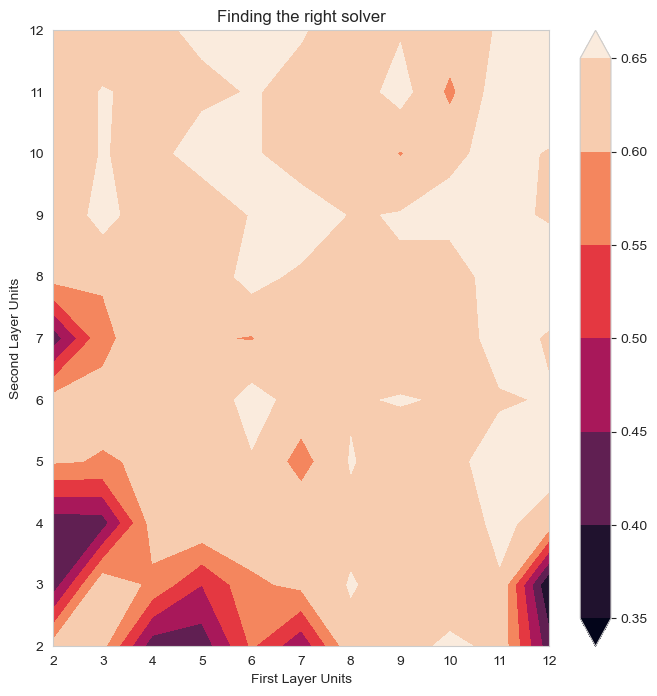

In [71]:
ACC = []
for i in range(2,13):
    for j in range(2,13):
        nn = MLPClassifier(hidden_layer_sizes = (i, j),random_state = 0)
        nn.fit(x_train, y_train)
        y_pred = nn.predict(x_val)
        ACC.append(accuracy_score(y_val, y_pred))
x, y = np.meshgrid(range(2,13), range(2,13))
z = np.array(ACC).reshape(len(x), len(y))
fig = plt.figure(figsize=(8,8))
ax = plt.contourf(y, x, z, origin='upper', extend='both')
fig.colorbar(ax)
plt.xlabel("First Layer Units")
plt.ylabel("Second Layer Units")
plt.yticks(range(2,13))
plt.xticks(range(2,13))
plt.title("Finding the right solver")
plt.show()

In [72]:
nn = MLPClassifier(hidden_layer_sizes = (3, 8),random_state = 0)
nn.fit(x_train, y_train)
y_pred = nn.predict(x_test)
acc_nn1 = accuracy_score(y_test, y_pred)
print("Best Neural Network accuracy is: ", acc_nn1)
y_pred = nn.predict(S_x)
acc_nn2 = accuracy_score(S_y, y_pred)
print("Neural Network accuracy is: ", acc_nn2)

Best Neural Network accuracy is:  0.632258064516129
Neural Network accuracy is:  0.6256476683937824


# SVM

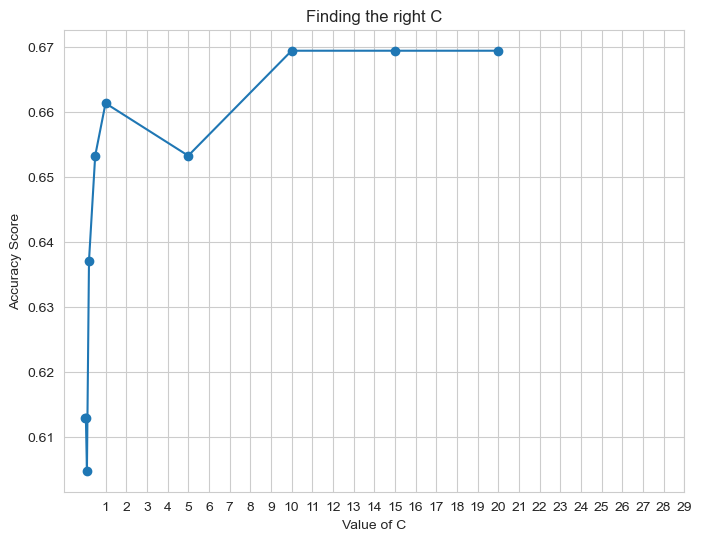

In [73]:
from sklearn.svm import SVC 

C = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10, 15, 20]
ACC = []
for c in C:
    svm = SVC(C = c,kernel = 'linear',random_state = 0) 
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_val)
    ACC.append(accuracy_score(y_val, y_pred))
plt.figure(figsize=(8,6))
plt.plot(C,ACC, marker = "o")
plt.xlabel("Value of C")
plt.ylabel("Accuracy Score")
plt.title("Finding the right C")
plt.xticks(range(1,30))
plt.grid()

In [74]:
svm = SVC(C = 15,kernel = 'linear',random_state = 0)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
acc_svm1 = accuracy_score(y_test, y_pred)
print("Best SVM accuracy is: ", acc_svm1)
y_pred = svm.predict(S_x)
acc_svm2 = accuracy_score(S_y, y_pred)
print("SVM accuracy is: ", acc_svm2)

Best SVM accuracy is:  0.6645161290322581
SVM accuracy is:  0.6683937823834197


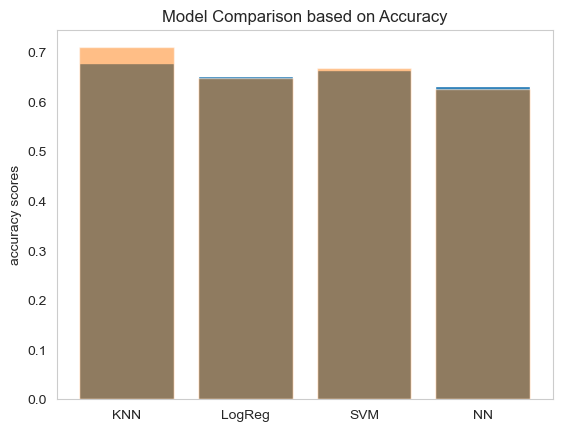

In [75]:
models = ['KNN', 'LogReg', 'SVM','NN']
acc_scores = [acc_knn1, acc_logreg1, acc_svm1, acc_nn1]
plt.bar(models, acc_scores)
plt.ylabel("accuracy scores")
plt.title("Model Comparison based on Accuracy")
acc_scores = [acc_knn2, acc_logreg2, acc_svm2, acc_nn2]
plt.bar(models, acc_scores,alpha=0.5)
plt.show()

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
As noticed our final accuracy score is around 0.8*0.6=0.48, So we choose the most percise model from one-step models, which was logreg
</P>

In [76]:
s=s.drop('primgroup',axis=1)
S_x=s.drop(['group','Close'],axis=1)
S_y=s['group'].tolist()
split=int(0.8*len(s))
x_train, x_test, y_train, y_test = train_test_split(S_x, S_y,test_size = 0.2,random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size = 0.2,random_state = 0)

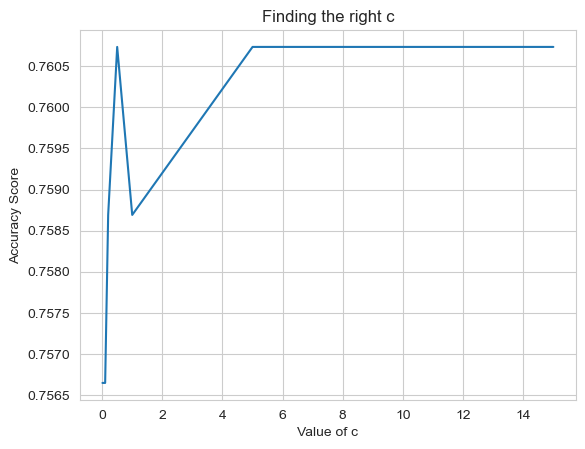

In [77]:
C = [0.01, 0.05, 0.1, 0.2, 0.5, 1, 5, 10, 15]
ACC = []
for c in C:
    logReg = LogisticRegression(C = c,multi_class = 'multinomial',solver = 'sag',random_state = 0) 
    logReg.fit(x_train, y_train)
    y_pred = logReg.predict(x_val)
    ACC.append(accuracy_score(y_val, y_pred))
plt.plot(C,ACC)
plt.xlabel("Value of c")
plt.ylabel("Accuracy Score")
plt.title("Finding the right c")
plt.grid()

In [78]:
logreg = LogisticRegression(C = C[np.argmax(ACC)],multi_class = 'multinomial',solver = 'sag',random_state = 0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = accuracy_score(y_test, y_pred)
print("Best logreg accuracy is: ", acc_logreg)
print(['Buy','Hold','Sell'])
print(confusion_matrix(y_test,y_pred,labels=['Buy','Hold','Sell']))

Best logreg accuracy is:  0.7692307692307693
['Buy', 'Hold', 'Sell']
[[  0  79   0]
 [  0 467   3]
 [  0  59   3]]


<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
The problem with this model is its few signals (Buy and Sell predictions), we solve this problem by reducing i in i*(mean of positive/negative returns) formula
</p>

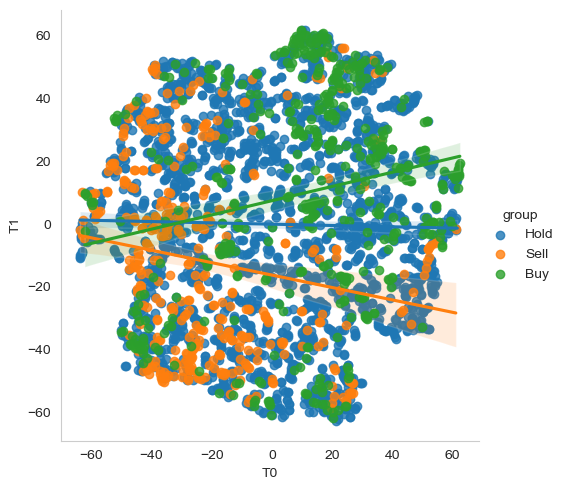

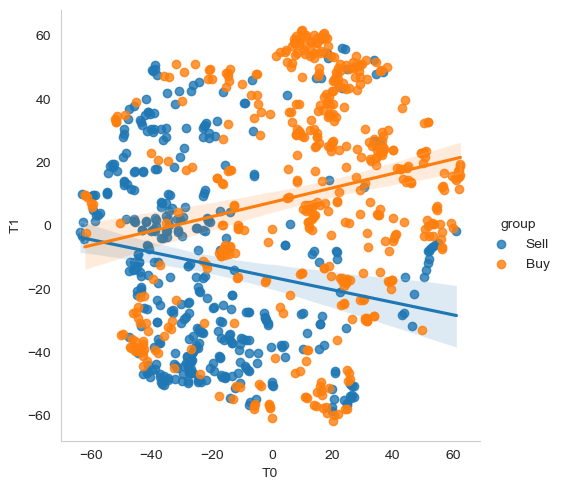

In [79]:
s['shifted']=s['Close'].shift(-days)
i=1.25
s['return']=(s['shifted']-s['Close'])/s['Close']
y=[]
for c in s['return']:
    if c>=0 and c>=i*np.mean(s['return'][s['return'] >0].values):
        y.append('Buy')
    elif c <0 and c<=i*np.mean(s['return'][s['return'] <0].values):
        y.append('Sell')
    else:
        y.append('Hold')
scaled_X1['group']=y
sns.lmplot(x='T0', y='T1', data=scaled_X1, hue='group', fit_reg=True)
sns.lmplot(x='T0', y='T1', data=scaled_X1[scaled_X1['group']!='Hold'], hue='group', fit_reg=True)

In [80]:
s['group']=y
S_x=s.drop(['group','Close','shifted','return'],axis=1)
S_y=s['group'].tolist()
split=int(0.8*len(s))
x_train, x_test, y_train, y_test = train_test_split(S_x, S_y,test_size = 0.2,random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size = 0.2,random_state = 0)

In [81]:
logreg = LogisticRegression(C = C[np.argmax(ACC)],multi_class = 'multinomial',solver = 'sag',random_state = 0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = accuracy_score(y_test, y_pred)
print("Best logreg accuracy is: ", acc_logreg)
print(['Buy','Hold','Sell'])
print(confusion_matrix(y_test,y_pred,labels=['Buy','Hold','Sell']))

Best logreg accuracy is:  0.7021276595744681
['Buy', 'Hold', 'Sell']
[[  3  96   0]
 [  5 420   2]
 [  0  79   6]]


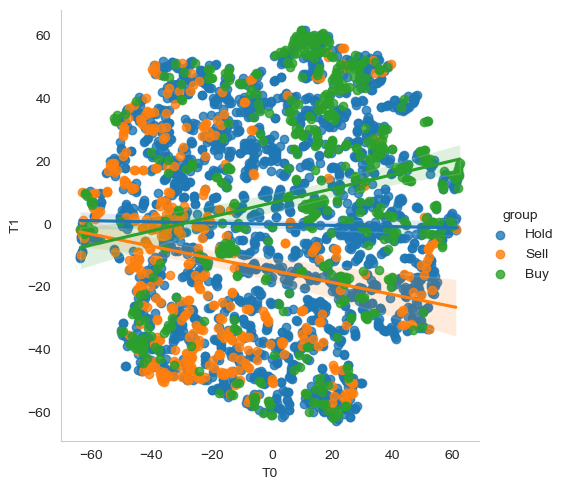

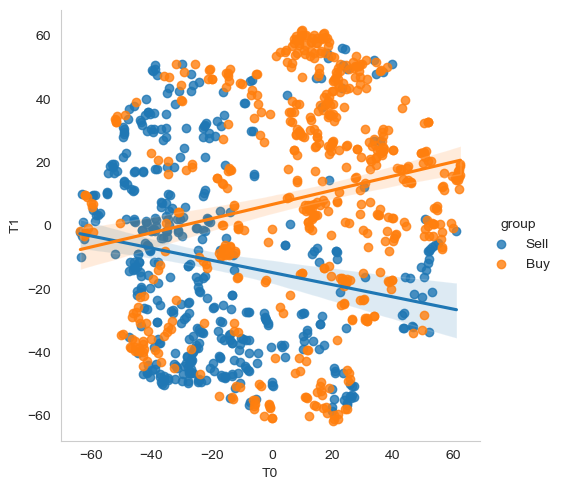

In [82]:
s['shifted']=s['Close'].shift(-days)
i=1.1
s['return']=(s['shifted']-s['Close'])/s['Close']
y=[]
for c in s['return']:
    if c>=0 and c>=i*np.mean(s['return'][s['return'] >0].values):
        y.append('Buy')
    elif c <0 and c<=i*np.mean(s['return'][s['return'] <0].values):
        y.append('Sell')
    else:
        y.append('Hold')
scaled_X1['group']=y
sns.lmplot(x='T0', y='T1', data=scaled_X1, hue='group', fit_reg=True)
sns.lmplot(x='T0', y='T1', data=scaled_X1[scaled_X1['group']!='Hold'], hue='group', fit_reg=True)

In [83]:
s['group']=y
S_x=s.drop(['group','Close','shifted','return'],axis=1)
S_y=s['group'].tolist()
split=int(0.8*len(s))
x_train, x_test, y_train, y_test = train_test_split(S_x, S_y,test_size = 0.2,random_state = 0)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size = 0.2,random_state = 0)

In [84]:
logreg = LogisticRegression(C = C[np.argmax(ACC)],multi_class = 'multinomial',solver = 'sag',random_state = 0)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
acc_logreg = accuracy_score(y_test, y_pred)
print("Best logreg accuracy is: ", acc_logreg)
print(['Buy','Hold','Sell'])
print(confusion_matrix(y_test,y_pred,labels=['Buy','Hold','Sell']))

Best logreg accuracy is:  0.6710310965630114
['Buy', 'Hold', 'Sell']
[[  5 107   0]
 [  5 399   3]
 [  0  86   6]]


In [85]:
s['shifted']=s['Close'].shift(-days)
s['return']=(s['shifted']-s['Close'])/s['Close']
S=s[:-days]
tests1=[]
tests2=[]
tests3=[]
tests4=[]
for i in [1,1.1,1.2,1.3,1.4,1.5]:
    y=[]
    for c in S['return']:
        if c>=0 and c>=i*np.mean(S['return'][S['return'] >0].values):
            y.append('Buy')
        elif c <0 and c<=i*np.mean(S['return'][S['return'] <0].values):
            y.append('Sell')
        elif c>=0 and c<i*np.mean(S['return'][S['return'] >0].values):
            y.append('Positive Hold')
        elif c <0 and c>i*np.mean(S['return'][S['return'] <0].values):
            y.append('Negative Hold')
    S['group']=y
    S_x=S.drop(['group','Close','shifted','return'],axis=1)
    S_y=S['group'].tolist()
    x_train, x_test, y_train, y_test = train_test_split(S_x, S_y,test_size = 0.2,random_state = 0)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size = 0.2,random_state = 0)
    logreg = LogisticRegression(C = C[np.argmax(ACC)],multi_class = 'multinomial',solver = 'sag',random_state = 0)
    logreg.fit(x_train, y_train)
    y_pred = logreg.predict(S_x)
    matrix=confusion_matrix(S_y,y_pred,labels=['Buy','Positive Hold','Negative Hold','Sell'])
    tests1.append(matrix[0][0]+matrix[1][0]+matrix[2][0]+matrix[3][0]+matrix[0][3]+matrix[1][3]+matrix[2][3]+matrix[3][3])
    tests2.append(matrix[0][0]+matrix[3][3])
    tests3.append(matrix[3][0]+matrix[0][3])
    tests4.append(matrix[3][0]+matrix[0][3]+matrix[2][0]+matrix[1][3])
print('Total','100% Correct','100% False','Semi and 100% False',sep='/')
print(tests1,tests2,tests3,tests4,sep='\n')

Total/100% Correct/100% False/Semi and 100% False
[730, 414, 284, 212, 130, 69]
[334, 210, 153, 117, 74, 41]
[31, 12, 7, 3, 1, 1]
[142, 68, 39, 26, 15, 8]


In [86]:
risk=np.array(tests4)/np.array(tests1)

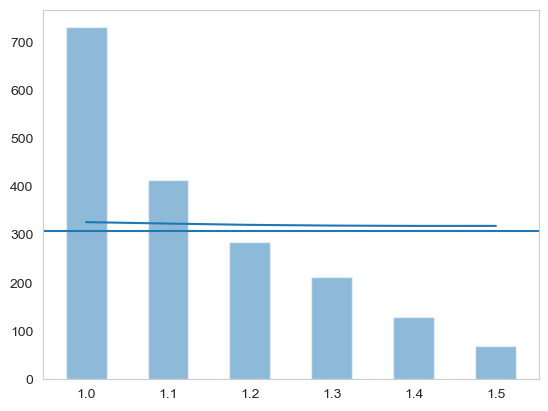

In [87]:
x = [1,1.1,1.2,1.3,1.4,1.5]
plt.bar(x, tests1, 0.05,alpha=0.5)
plt.plot(x,np.array(tests1).mean()+risk*100)
plt.axhline(np.array(tests1).mean())
plt.show()

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
This plot reveals that the number of signals descends much faster than (incorrect signals/signals), So we choose i=1
</p>

In [88]:
i=1
days=7
s['shifted']=s['Close'].shift(-days)
s['return']=(s['shifted']-s['Close'])/s['Close']
S=s[:-days]
y=[]
for c in S['return']:
    if c>=0 and c>=i*np.mean(S['return'][S['return'] >0].values):
        y.append('Buy')
    elif c <0 and c<=i*np.mean(S['return'][S['return'] <0].values):
        y.append('Sell')
    elif c>=0 and c<i*np.mean(S['return'][S['return'] >0].values):
        y.append('Positive Hold')
    elif c <0 and c>i*np.mean(S['return'][S['return'] <0].values):
        y.append('Negative Hold')
S['group']=y
S_x=S.drop(['group','Close','shifted','return'],axis=1)
S_y=S['group'].tolist()
logreg = LogisticRegression(C = C[np.argmax(ACC)],multi_class = 'multinomial',solver = 'sag',random_state = 0)
logreg.fit(S_x, S_y)

LogisticRegression(C=0.5, multi_class='multinomial', random_state=0,
                   solver='sag')

In [89]:
x_pred_normalized

MFI               0.427639
RSI               0.443215
%k                     1.0
Close         29438.830078
datep               202308
MA3norm           0.608139
MA10norm               1.0
MA30norm               0.0
MA50norm          0.758436
MA100norm              1.0
MA150norm              1.0
MA200norm              1.0
Volumenorm        0.451167
shifted                NaN
Name: 2023-08-15 00:00:00, dtype: object

In [90]:
logreg.predict(pd.DataFrame(x_pred_normalized).T.drop(['Close','datep','shifted'],axis=1))

array(['Negative Hold'], dtype='<U13')

In [91]:
x_pred=s.drop(['group','shifted','return'],axis=1)[-299:]
x_pred=pd.concat([x_pred,pd.DataFrame(x_pred_normalized).T.drop(['Close','datep','shifted'],axis=1)])
x_pred['signal']=logreg.predict(x_pred.drop('Close',axis=1))
x_pred

MFI       RSI        %k         Close   MA3norm  MA10norm  \
2022-10-20  0.353999  0.325969   0.23937  19053.740234   0.03774  0.003506   
2022-10-21  0.355277   0.41864  0.860819  19172.468750  0.003276  0.016037   
2022-10-22  0.426835  0.452774  0.655695  19208.189453  0.017887   0.02129   
2022-10-23  0.426317  0.523782  0.847557  19567.007812  0.127114  0.040347   
2022-10-24  0.426317  0.541622  0.363761  19345.572266  0.163952  0.056901   
...              ...       ...       ...           ...       ...       ...   
2023-08-11  0.427364  0.516424  0.545673  29397.714844  0.769924  0.359205   
2023-08-12  0.427459   0.51246  0.542913  29415.964844  0.678883  0.513098   
2023-08-13  0.427382  0.501571  0.097408  29282.914062  0.587124  0.573858   
2023-08-14  0.427481   0.53565  0.530334  29408.443359  0.593835  0.768756   
2023-08-15  0.427639  0.443215       1.0           NaN  0.608139       1.0   

            MA30norm  MA50norm MA100norm MA150norm MA200norm Volumenorm  \
2022-10-20  0.011178  0.056234  0.504436  0.328321  0.343398   0.196056   
2022-10-21  0.054054  0.035763   0.47828  0.296414  0.305068   0.382198   
2022-10-22  0.039967  0.019432  0.444019  0.264901  0.268278        0.0   
2022-10-23  0.058444  0.013748  0.412084  0.235377  0.235269   0.140784   
2022-10-24  0.086469       0.0   0.36567  0.207126  0.201536   0.329453   
...              ...       ...       ...       ...       ...        ...   
2023-08-11  0.290113   0.95169  0.751543  0.839364   0.74682   0.307322   
2023-08-12  0.165832  0.896116  0.829786  0.898341  0.813658        0.0   
2023-08-13  0.102417  0.841139  0.795161   0.94784  0.874439   0.087226   
2023-08-14  0.048884  0.794586  0.864533  0.971062  0.937296   0.600642   
2023-08-15       0.0  0.758436       1.0       1.0       1.0   0.451167   

                   signal  
2022-10-20  Positive Hold  
2022-10-21  Positive Hold  
2022-10-22  Positive Hold  
2022-10-23  Positive Hold  
2022-10-24  Positive Hold  
...                   ...  
2023-08-11  Negative Hold  
2023-08-12  Negative Hold  
2023-08-13  Negative Hold  
2023-08-14  Negative Hold  
2023-08-15  Negative Hold  

[300 rows x 13 columns]

Text(0.5, 1.0, 'Signals in the last 300 days')

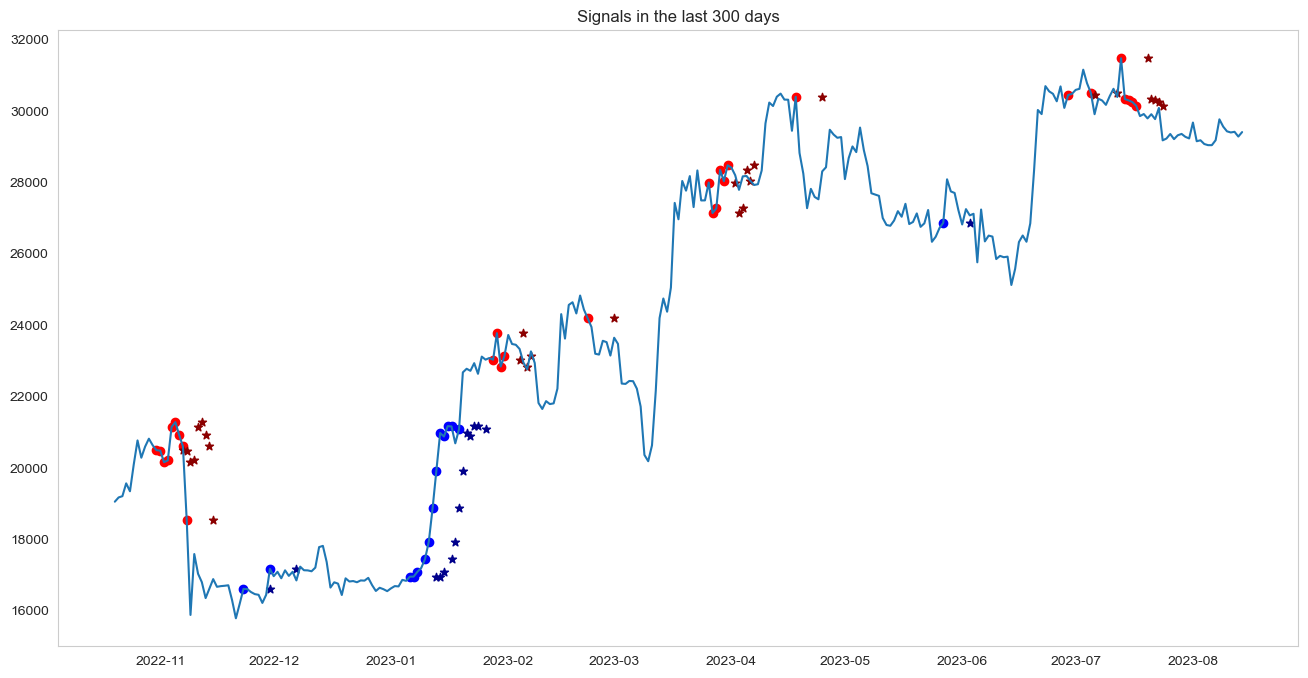

In [92]:
from datetime import timedelta
plt.figure(figsize=(16,8))
plt.plot(x_pred['Close'])
plt.scatter(x_pred[x_pred['signal']=='Buy'].index,x_pred[x_pred['signal']=='Buy']['Close'],c='blue')
plt.scatter(x_pred[x_pred['signal']=='Buy'].index+timedelta(days=days),x_pred[x_pred['signal']=='Buy']['Close'],c='darkblue',marker='*')
plt.scatter(x_pred[x_pred['signal']=='Sell'].index,x_pred[x_pred['signal']=='Sell']['Close'],c='red')
plt.scatter(x_pred[x_pred['signal']=='Sell'].index+timedelta(days=days),x_pred[x_pred['signal']=='Sell']['Close'],c='darkred',marker='*')
plt.title('Signals in the last 300 days')

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
Here we use two methods (Monte Carlo and Linear Regression) to predict next ten days
</p>

# Monte Carlo

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
:Attention
</p>
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
u = mean of logarithmic return
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
var = variance of logarithmic return
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
drift = u -0.5*var
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
stdev = standard deviation of logarithmic return
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
z =ppf of a random number between 0 and 1
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
r = drift + stdev * z
<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
current price = e^r * last price
</p>

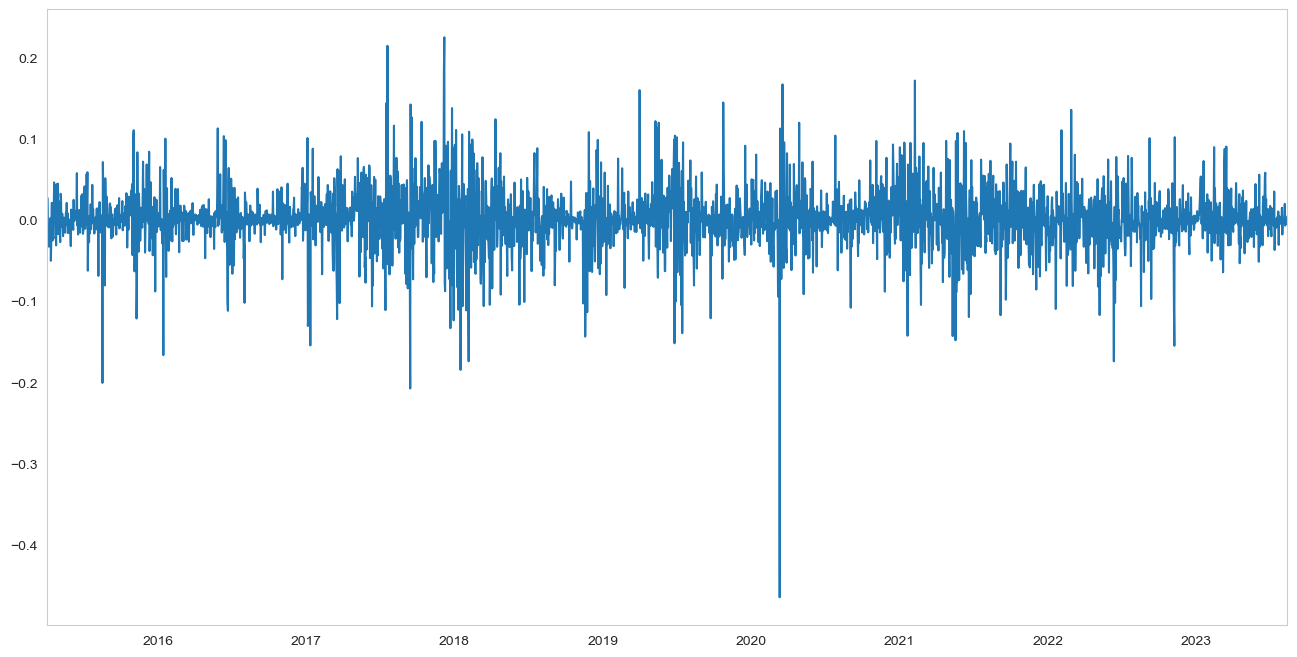

In [93]:
from scipy.stats import norm
returns = np.log(1+s['Close'].pct_change())
returns.plot(figsize=(16,8))
u = returns.mean()
var=returns.var()

In [94]:
drift = u - (0.5*var)
drift

0.0008565325236910616

In [95]:
stdev = returns.std()
stdev

0.03740997583418492

In [96]:
time_interval = 10
iteration = 5000
daily_return = np.exp(drift+ stdev*norm.ppf(np.random.rand(time_interval , iteration)))
daily_return

array([[1.02527022, 1.01355453, 0.94996733, ..., 1.0744713 , 0.96495477,
        1.03368497],
       [1.03585251, 0.99626804, 0.99514524, ..., 1.04720262, 0.99742363,
        0.99863086],
       [0.97424637, 1.02974409, 0.99211305, ..., 0.98767065, 0.98250123,
        0.91658454],
       ...,
       [0.93352837, 0.99414554, 1.00434995, ..., 1.00980611, 0.99564633,
        0.88858062],
       [1.00734422, 0.98765439, 1.04745421, ..., 0.97798597, 1.04053241,
        0.96215809],
       [1.0298671 , 0.99599271, 0.95895896, ..., 0.97892517, 1.0462459 ,
        1.02992084]])

In [97]:
p = s['Close'].iloc[-1]
p

29408.443359375

<p style="font-family:Timesnewroman; font-size:180%;" dir="rtl">
Predictions
</p>

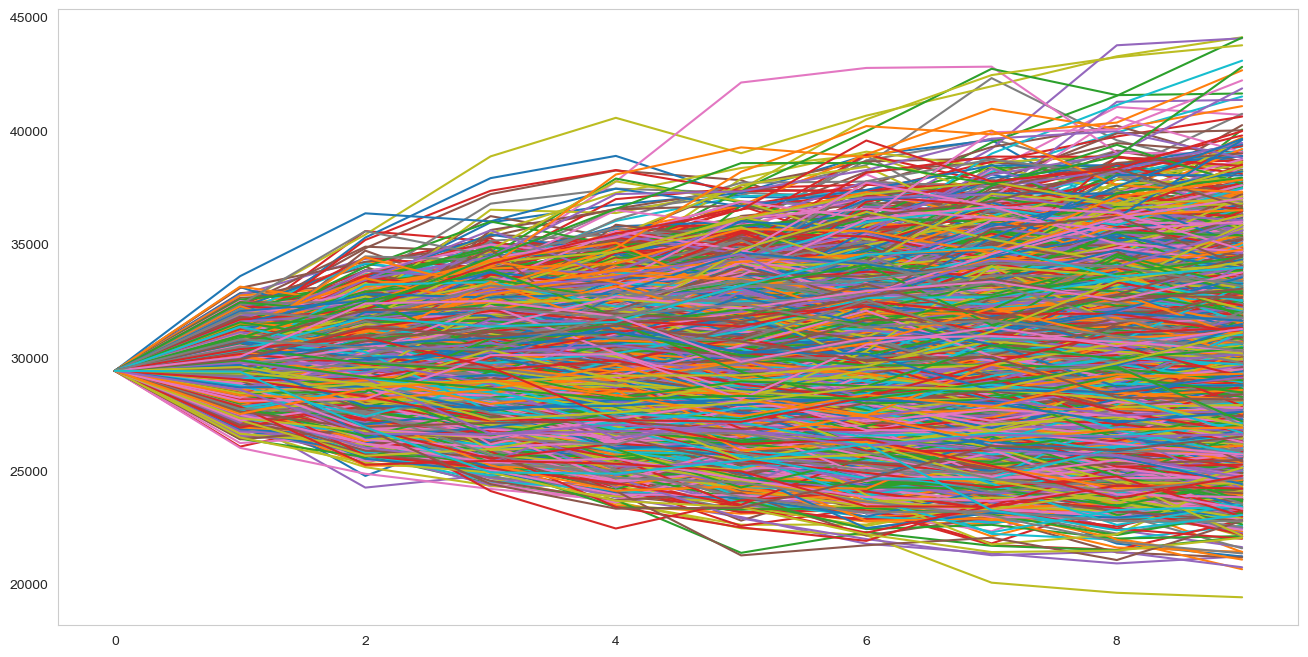

In [98]:
price_list = np.zeros_like(daily_return)
price_list[0] = p
price_list
for t in range(1 , time_interval):
    price_list[t] = price_list[t-1]*daily_return[t]    
plt.figure(figsize=(16,8))
plt.plot(price_list)
plt.show()

<p style="font-family:Timesnewroman; font-size:180%;" dir="rtl">
Distribution of the last prices
</p>

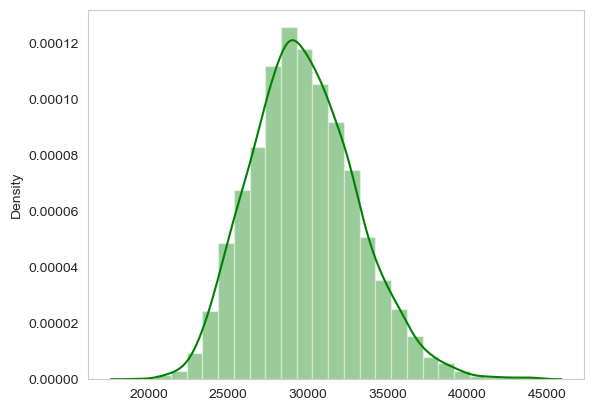

In [99]:
finalprices= pd.Series(price_list[-1])
fig, ax = plt.subplots()
sns.distplot(finalprices, bins=25, color="g", ax=ax)
plt.show()

<p style="font-family:Timesnewroman; font-size:180%;" dir="rtl">
Final prediction
</p>

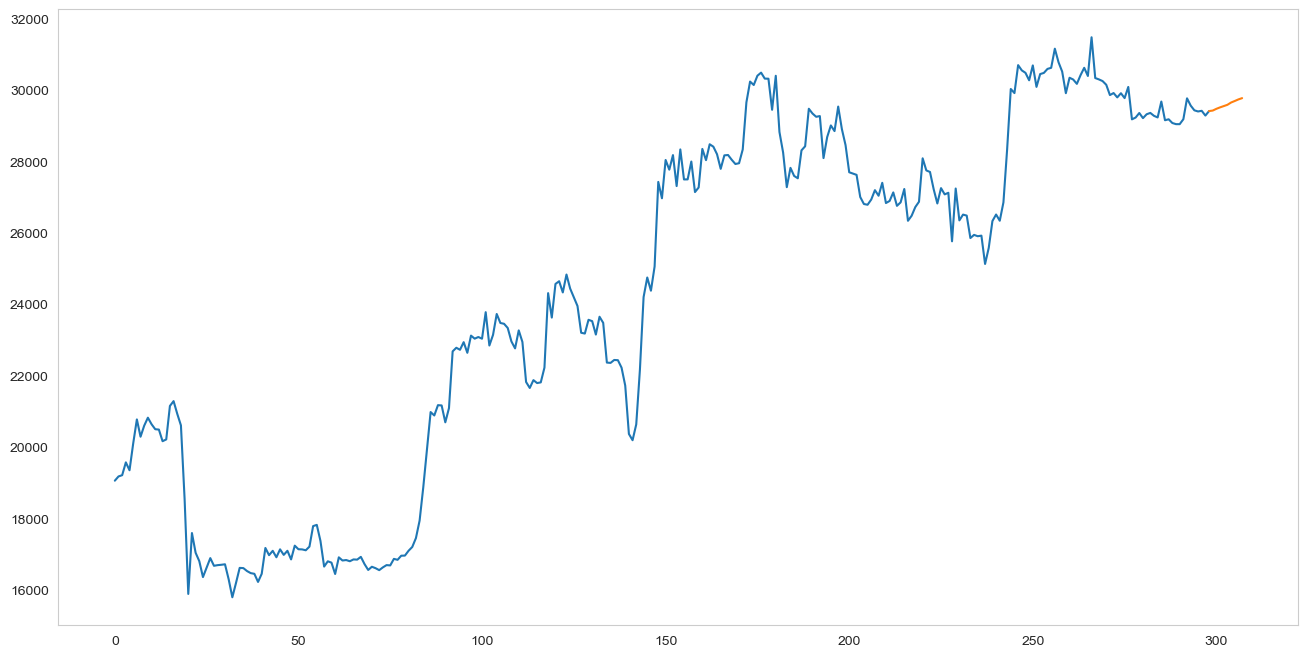

In [100]:
prices=[]
for i in range(10):
    prices.append(price_list[i].mean())
plt.figure(figsize=(16,8))
plt.plot(range(300),x_pred['Close'])
plt.plot(range(298,308),prices)

# Linear Regression

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
As mentioned above simple lr is the best linear regression model, and to get the most accurate model we need to remove Open price and Volume from our dataframe
</p>

In [101]:
i=10
d=yf.download(symbol)
d['shifted']=d['Close'].shift(-i)
d=d.drop(['Adj Close'],axis=1)
x=d.drop(['shifted','Volume','Open'],1)
x=x[:-i]
y=d[['shifted']]
y=y[:-i]
lr=LinearRegression()
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size = 0.2,random_state = 10)
lr.fit(x_train,y_train)
print('Score=',lr.score(x_test,y_test))

[*********************100%***********************]  1 of 1 completed
Score= 0.9787769972671163


In [102]:
print(x.columns)
lr.coef_

Index(['High', 'Low', 'Close'], dtype='object')


array([[ 0.1128703 , -0.21918711,  1.08054267]])

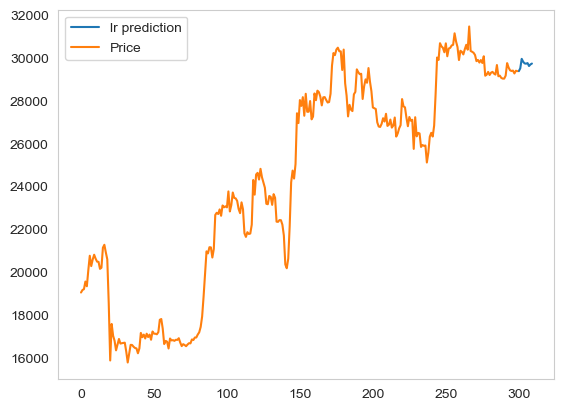

In [103]:
pred=lr.predict(d.drop(['shifted','Volume','Low'],1)[-10:])
pred=pred+(d['Close'][-1]-pred[0])
plt.plot(range(300,310),pred,label='lr prediction')
plt.plot(range(300),d['Close'][-300:],label='Price')
plt.legend()

In [104]:
prices=pd.DataFrame(prices)
prices=prices.set_index(pd.DatetimeIndex(d[-10:].index+timedelta(10)))
pred=pd.DataFrame(pred)
pred=pred.set_index(pd.DatetimeIndex(d[-10:].index+timedelta(10)))

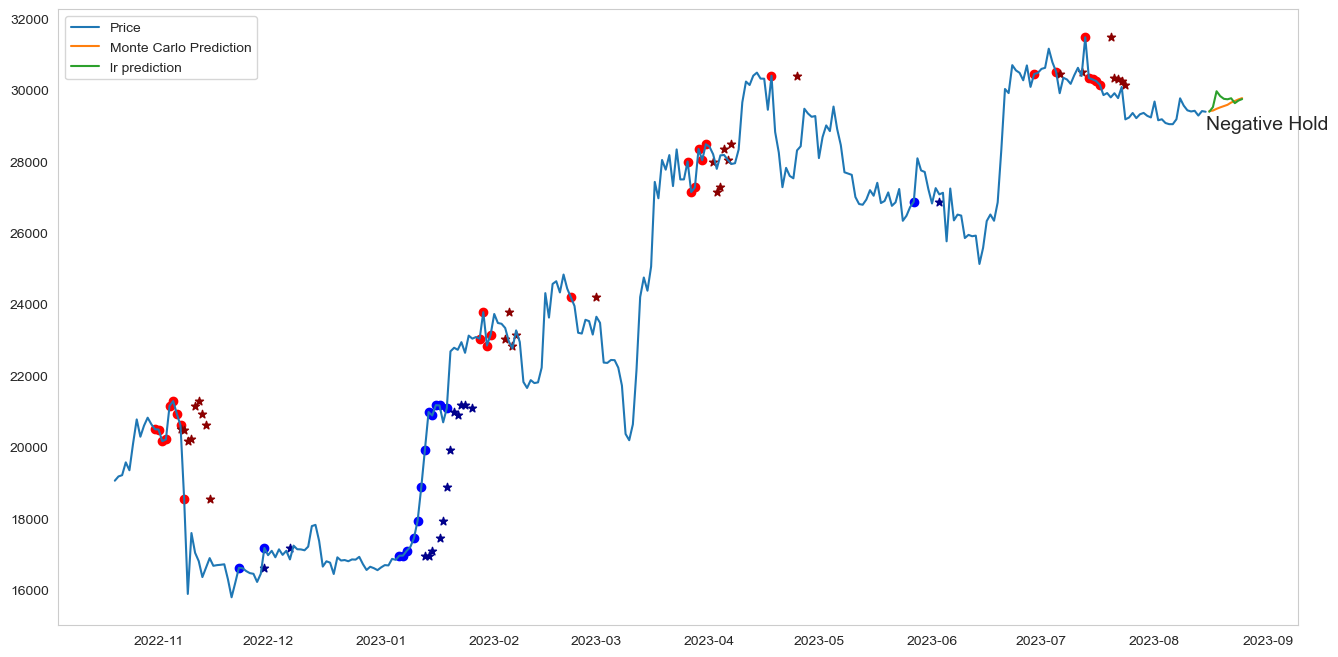

In [105]:
plt.figure(figsize=(16,8))
plt.plot(d['Close'][-300:],label='Price')
plt.plot(prices,label='Monte Carlo Prediction')
plt.plot(pred,label='lr prediction')
plt.scatter(x_pred[x_pred['signal']=='Buy'].index,x_pred[x_pred['signal']=='Buy']['Close'],c='blue')
plt.scatter(x_pred[x_pred['signal']=='Buy'].index+timedelta(days=days),x_pred[x_pred['signal']=='Buy']['Close'],c='darkblue',marker='*')
plt.scatter(x_pred[x_pred['signal']=='Sell'].index,x_pred[x_pred['signal']=='Sell']['Close'],c='red')
plt.scatter(x_pred[x_pred['signal']=='Sell'].index+timedelta(days=days),x_pred[x_pred['signal']=='Sell']['Close'],c='darkred',marker='*')
signal=logreg.predict(pd.DataFrame(x_pred_normalized).T.drop(['Close','datep','shifted'],axis=1))[0]
plt.text(d.index[-1],d['Close'][-1]-500,signal,fontsize=14)
plt.legend()

<p style="font-family:Timesnewroman; font-size:140%;" dir="rtl">
As our final step we calculate the Risk/Reward ratio, Here from risk we mean E(Loss) and reward means E(profit)
</p>

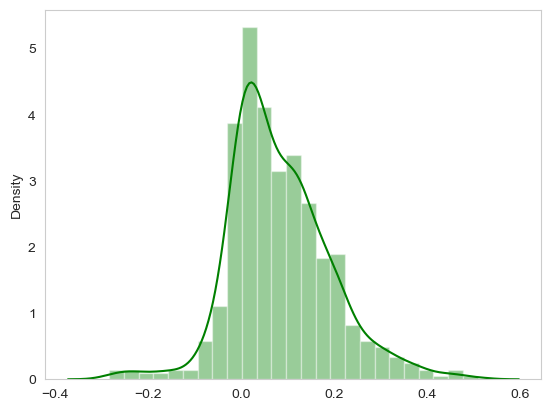

In [106]:
s=s.drop(['Close','group','shifted'],1)
s['signal']=logreg.predict(s.drop('return',1))
rtrns=[]
for i in range(len(s)):
    if s['signal'][i]=='Buy':
        rtrns.append(s['return'][i])
    elif s['signal'][i]=='Sell':
        rtrns.append(-s['return'][i])
rtrns= pd.Series(rtrns)
fig, ax = plt.subplots()
sns.distplot(rtrns, bins=25, color="g", ax=ax)
plt.show()

In [107]:
mean_reward=np.array(rtrns[rtrns > 0]).mean()
reward_chance=len(rtrns[rtrns > 0])/len(rtrns)
reward=round(mean_reward*reward_chance,2)*100
mean_risk=np.array(rtrns[rtrns < 0]).mean()
risk_chance=len(rtrns[rtrns < 0])/len(rtrns)
risk=round(mean_risk*risk_chance,2)*100
print('r/r :',-risk/reward)
print('mean_reward :',mean_reward)
print('reward_chance :',reward_chance)
print('mean_risk :',mean_risk)
print('risk_chance :',risk_chance)

r/r : 0.1111111111111111
mean_reward : 0.11335749223558579
reward_chance : 0.8144171779141104
mean_risk : -0.04721945859839182
risk_chance : 0.18558282208588958


# Final chart

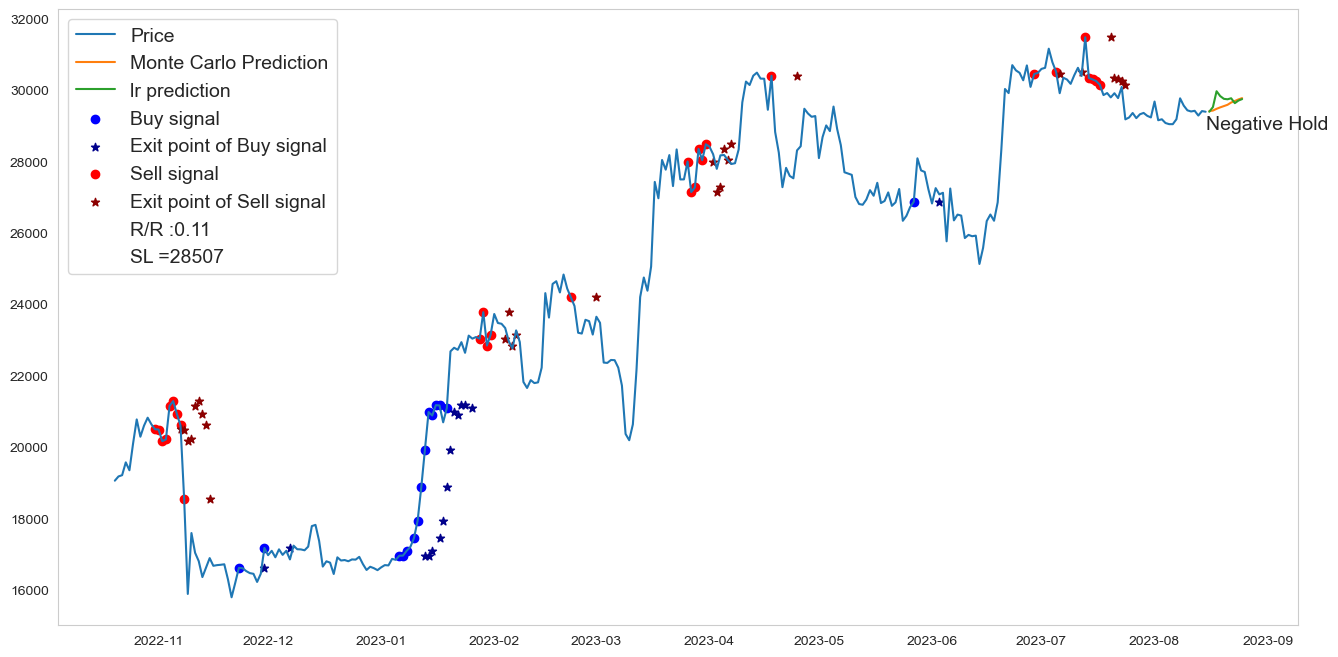

In [108]:
plt.figure(figsize=(16,8))
plt.plot(d['Close'][-300:],label='Price')
plt.plot(prices,label='Monte Carlo Prediction')
plt.plot(pred,label='lr prediction')
plt.scatter(x_pred[x_pred['signal']=='Buy'].index,x_pred[x_pred['signal']=='Buy']['Close'],c='blue',label='Buy signal')
plt.scatter(x_pred[x_pred['signal']=='Buy'].index+timedelta(days=days),x_pred[x_pred['signal']=='Buy']['Close'],c='darkblue',marker='*',label='Exit point of Buy signal')
plt.scatter(x_pred[x_pred['signal']=='Sell'].index,x_pred[x_pred['signal']=='Sell']['Close'],c='red',label='Sell signal')
plt.scatter(x_pred[x_pred['signal']=='Sell'].index+timedelta(days=days),x_pred[x_pred['signal']=='Sell']['Close'],c='darkred',marker='*',label='Exit point of Sell signal')
signal=logreg.predict(pd.DataFrame(x_pred_normalized).T.drop(['Close','datep','shifted'],axis=1))[0]
plt.text(d.index[-1],d['Close'][-1]-500,signal,fontsize=14)
plt.plot([], [],' ', label=f"R/R :{round(-risk/reward,2)}")
plt.plot([], [],' ', label=f"SL ={int(0.97*d['Close'][-1])}")
plt.legend(fontsize=14)